In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

import pandas as pd

from main import parse_config, instantiate_agents, instantiate_auction
from AuctionAllocation import *
from Bidder import *
from copy import copy, deepcopy
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import shap
import os
import numpy as np
import pickle

import sys
sys.path.append("/Users/keithwu/Documents/GitHub/auction-gym/src/c_utree_boost")


from c_utree_boost import Agent_boost_Galen_action_numpy as Agent

from c_utree_boost import Problem
import statistics
from m5py import M5Prime, export_text_m5

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
estimator = "DR"
competition = "L"
agent_num = 3
special = "7_contexts"
num_contexts = 7

# Normal Data

In [3]:
# Parse configuration file
rng, config, agent_configs, agents2items, agents2item_values,\
num_runs, max_slots, embedding_size, embedding_var,\
obs_embedding_size = parse_config('../config/FP_DR_TS_7contexts.json')

In [4]:
# Instantiate Agent and Auction objects
agents = instantiate_agents(rng, agent_configs, agents2item_values, agents2items)
# bid = value * estimated_CTR * gamma
# Instantiate Auction object
auction, num_iter, rounds_per_iter, output_dir =\
    instantiate_auction(rng,
                        config,
                        agents2items,
                        agents2item_values,
                        agents,
                        max_slots,
                        embedding_size,
                        embedding_var,
                        obs_embedding_size)

  0%|          | 0/25 [00:00<?, ?it/s]

number of iteration: 0

agent: 0




DR 1:  33%|███▎      | 5339/16384 [00:14<00:29, 380.05it/s]
The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3281.)


Stopping at Epoch 5339



DR 1: 100%|██████████| 32768/32768 [00:21<00:00, 1518.69it/s]


AUC predicting P(win):				 0.8223973289324682
Estimated Utility	 Mean Error:			 0.46124202186275964
Estimated Utility	 Mean Absolute Error:	 0.4936144657695672



Initialising Policy: 100%|██████████| 16384/16384 [00:25<00:00, 642.95it/s]


Predicted mu Gammas:  tensor(0.9847, grad_fn=<MinBackward1>) tensor(1.0062, grad_fn=<MaxBackward1>) tensor(0.9999, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0397, grad_fn=<MinBackward1>) tensor(0.0959, grad_fn=<MaxBackward1>) tensor(0.0499, grad_fn=<MeanBackward0>)



DR 1:  30%|██▉       | 9689/32768 [00:33<01:19, 290.76it/s]


Stopping at Epoch 9689
DR 1 Number of samples:  torch.Size([6715, 2])
DR 1 Predicted Gammas:  0.7004265 1.0 0.79233015
agent: 1




DR 2:  37%|███▋      | 6070/16384 [00:15<00:26, 388.27it/s]


Stopping at Epoch 6070



DR 2: 100%|██████████| 32768/32768 [00:12<00:00, 2623.12it/s]


AUC predicting P(win):				 0.8361501058451184
Estimated Utility	 Mean Error:			 0.449256491960729
Estimated Utility	 Mean Absolute Error:	 0.47627272569677126



Initialising Policy:  97%|█████████▋| 15958/16384 [00:26<00:00, 612.96it/s]


Stopping at Epoch 15958
Predicted mu Gammas:  tensor(0.9850, grad_fn=<MinBackward1>) tensor(1.0067, grad_fn=<MaxBackward1>) tensor(0.9998, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0452, grad_fn=<MinBackward1>) tensor(0.0674, grad_fn=<MaxBackward1>) tensor(0.0516, grad_fn=<MeanBackward0>)



DR 2:  41%|████      | 13398/32768 [00:44<01:03, 302.67it/s]


Stopping at Epoch 13398
DR 2 Number of samples:  torch.Size([6657, 2])
DR 2 Predicted Gammas:  0.6507057 0.85690045 0.72983575
agent: 2




DR 3:  28%|██▊       | 4534/16384 [00:23<01:00, 196.77it/s]


Stopping at Epoch 4534



DR 3: 100%|██████████| 32768/32768 [00:12<00:00, 2573.97it/s]


AUC predicting P(win):				 0.7482121938305836
Estimated Utility	 Mean Error:			 0.4806281354803894
Estimated Utility	 Mean Absolute Error:	 0.5143181869538088



Initialising Policy: 100%|██████████| 16384/16384 [00:24<00:00, 661.01it/s]


Predicted mu Gammas:  tensor(0.9693, grad_fn=<MinBackward1>) tensor(1.0068, grad_fn=<MaxBackward1>) tensor(0.9995, grad_fn=<MeanBackward0>)
Predicted sigma Gammas:  tensor(0.0368, grad_fn=<MinBackward1>) tensor(0.1407, grad_fn=<MaxBackward1>) tensor(0.0491, grad_fn=<MeanBackward0>)



DR 3:  38%|███▊      | 12517/32768 [00:39<01:03, 318.20it/s]


Stopping at Epoch 12517
DR 3 Number of samples:  torch.Size([6628, 2])
DR 3 Predicted Gammas:  0.72510993 0.9190544 0.784166
number of iteration: 1

agent: 0




DR 1:  17%|█▋        | 2841/16384 [00:12<00:57, 235.24it/s]


Stopping at Epoch 2841
AUC predicting P(win):				 0.8003919613414958
Estimated Utility	 Mean Error:			 -0.013511757973051222
Estimated Utility	 Mean Absolute Error:	 0.27040235386592887



DR 1:  25%|██▌       | 8253/32768 [00:03<00:09, 2722.46it/s]

Epoch 07697: reducing learning rate of group 0 to 6.0000e-04.
Epoch 07991: reducing learning rate of group 0 to 1.2000e-04.
Epoch 08248: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  28%|██▊       | 9101/32768 [00:03<00:08, 2730.42it/s]

Epoch 08505: reducing learning rate of group 0 to 4.8000e-06.
Epoch 08762: reducing learning rate of group 0 to 9.6000e-07.
Epoch 09019: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 9101


AUC predicting P(win):				 0.8006499692588244
Estimated Utility	 Mean Error:			 0.05930124738131751
Estimated Utility	 Mean Absolute Error:	 0.2581039581853286



DR 1:   6%|▌         | 2011/32768 [00:06<01:38, 311.23it/s]


Stopping at Epoch 2011
DR 1 Number of samples:  torch.Size([6661, 2])
DR 1 Predicted Gammas:  0.7312811 1.0 0.8804001
agent: 1




DR 2:   7%|▋         | 1150/16384 [00:03<00:41, 364.89it/s]


Stopping at Epoch 1150
AUC predicting P(win):				 0.8186855903065684
Estimated Utility	 Mean Error:			 -0.0691435330311135
Estimated Utility	 Mean Absolute Error:	 0.21359517404089748



DR 2:  74%|███████▎  | 24155/32768 [00:08<00:03, 2676.61it/s]

Epoch 23960: reducing learning rate of group 0 to 6.0000e-04.
Epoch 24234: reducing learning rate of group 0 to 1.2000e-04.



DR 2:  76%|███████▋  | 24988/32768 [00:08<00:03, 2535.99it/s]

Epoch 24491: reducing learning rate of group 0 to 2.4000e-05.
Epoch 24748: reducing learning rate of group 0 to 4.8000e-06.
Epoch 25005: reducing learning rate of group 0 to 9.6000e-07.



DR 2:  78%|███████▊  | 25485/32768 [00:09<00:02, 2802.88it/s]


Epoch 25262: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 25485
AUC predicting P(win):				 0.8258809190622755
Estimated Utility	 Mean Error:			 0.0010256938899350452
Estimated Utility	 Mean Absolute Error:	 0.20684353606655836



DR 2:  24%|██▍       | 7936/32768 [00:26<01:22, 301.79it/s]


Stopping at Epoch 7936
DR 2 Number of samples:  torch.Size([6638, 2])
DR 2 Predicted Gammas:  0.62455666 0.8526757 0.71993476
agent: 2




DR 3:  14%|█▎        | 2238/16384 [00:08<00:54, 257.55it/s]


Stopping at Epoch 2238
AUC predicting P(win):				 0.7792580740471373
Estimated Utility	 Mean Error:			 -0.0012265583573553998
Estimated Utility	 Mean Absolute Error:	 0.27845467936619894



DR 3:  34%|███▍      | 11093/32768 [00:03<00:08, 2598.01it/s]

Epoch 10636: reducing learning rate of group 0 to 6.0000e-04.
Epoch 10907: reducing learning rate of group 0 to 1.2000e-04.



DR 3:  36%|███▌      | 11661/32768 [00:03<00:07, 2676.95it/s]

Epoch 11164: reducing learning rate of group 0 to 2.4000e-05.
Epoch 11421: reducing learning rate of group 0 to 4.8000e-06.
Epoch 11678: reducing learning rate of group 0 to 9.6000e-07.



DR 3:  37%|███▋      | 12107/32768 [00:04<00:06, 2954.79it/s]


Epoch 11935: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 12107
AUC predicting P(win):				 0.7867435623536899
Estimated Utility	 Mean Error:			 0.07487527602135297
Estimated Utility	 Mean Absolute Error:	 0.2708180314661574



DR 3:   4%|▍         | 1230/32768 [00:03<01:34, 332.52it/s]


Stopping at Epoch 1230
DR 3 Number of samples:  torch.Size([6701, 2])
DR 3 Predicted Gammas:  0.6370046 0.8344827 0.7084918
number of iteration: 2

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:03<00:51, 299.16it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8725695568855889
Estimated Utility	 Mean Error:			 -0.012770730590663474
Estimated Utility	 Mean Absolute Error:	 0.2692947364366292



DR 1:  14%|█▎        | 4457/32768 [00:01<00:11, 2430.27it/s]

Epoch 04154: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04411: reducing learning rate of group 0 to 1.2000e-04.



DR 1:  15%|█▌        | 4985/32768 [00:02<00:11, 2448.21it/s]

Epoch 04668: reducing learning rate of group 0 to 2.4000e-05.
Epoch 04948: reducing learning rate of group 0 to 4.8000e-06.



DR 1:  17%|█▋        | 5435/32768 [00:02<00:10, 2505.56it/s]


Epoch 05205: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 5435
AUC predicting P(win):				 0.8727533783140242
Estimated Utility	 Mean Error:			 -0.005090051823156959
Estimated Utility	 Mean Absolute Error:	 0.26438031557930475



DR 1:  11%|█         | 3546/32768 [00:11<01:36, 303.44it/s]


Stopping at Epoch 3546
DR 1 Number of samples:  torch.Size([6613, 2])
DR 1 Predicted Gammas:  0.57217026 1.0 0.79298294
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:03<00:51, 295.90it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7924010481337875
Estimated Utility	 Mean Error:			 -0.008074659728157511
Estimated Utility	 Mean Absolute Error:	 0.2500490898757695



DR 2:  17%|█▋        | 5451/32768 [00:01<00:09, 2746.64it/s]

Epoch 05146: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05489: reducing learning rate of group 0 to 1.2000e-04.
Epoch 05746: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  19%|█▉        | 6358/32768 [00:02<00:09, 2886.08it/s]

Epoch 06003: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06260: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06517: reducing learning rate of group 0 to 1.9200e-07.



DR 2:  21%|██        | 6746/32768 [00:02<00:09, 2875.05it/s]


Stopping at Epoch 6746
AUC predicting P(win):				 0.7921706855803083
Estimated Utility	 Mean Error:			 0.010639129220013109
Estimated Utility	 Mean Absolute Error:	 0.25057078720962084



DR 2:   6%|▋         | 2084/32768 [00:06<01:34, 325.76it/s]


Stopping at Epoch 2084
DR 2 Number of samples:  torch.Size([6685, 2])
DR 2 Predicted Gammas:  0.57273436 0.8153686 0.664255
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:03<00:53, 288.84it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7228818822250829
Estimated Utility	 Mean Error:			 -0.011536784660607891
Estimated Utility	 Mean Absolute Error:	 0.2522787257908466



DR 3:  12%|█▏        | 4004/32768 [00:01<00:09, 2921.46it/s]

Epoch 03475: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03889: reducing learning rate of group 0 to 1.2000e-04.



DR 3:  14%|█▍        | 4589/32768 [00:01<00:10, 2799.96it/s]

Epoch 04146: reducing learning rate of group 0 to 2.4000e-05.
Epoch 04403: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04660: reducing learning rate of group 0 to 9.6000e-07.



DR 3:  15%|█▌        | 5012/32768 [00:01<00:09, 2878.53it/s]


Epoch 04917: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 5012
AUC predicting P(win):				 0.7233742013459867
Estimated Utility	 Mean Error:			 -0.0009743449432339903
Estimated Utility	 Mean Absolute Error:	 0.25451388334525155



DR 3:  19%|█▉        | 6289/32768 [00:18<01:19, 333.35it/s]


Stopping at Epoch 6289
DR 3 Number of samples:  torch.Size([6702, 2])
DR 3 Predicted Gammas:  0.5659471 1.0 0.6858877
number of iteration: 3

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:03<00:58, 261.62it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.825604499111241
Estimated Utility	 Mean Error:			 -0.027243833049579762
Estimated Utility	 Mean Absolute Error:	 0.27310518610340573



DR 1:   6%|▌         | 1981/32768 [00:00<00:09, 3150.76it/s]

Epoch 01342: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01814: reducing learning rate of group 0 to 1.2000e-04.



DR 1:   8%|▊         | 2639/32768 [00:00<00:09, 3138.59it/s]

Epoch 02071: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02328: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02585: reducing learning rate of group 0 to 9.6000e-07.


DR 1:   9%|▉         | 2939/32768 [00:00<00:09, 3070.41it/s]


Epoch 02842: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2939
AUC predicting P(win):				 0.8259138418767716
Estimated Utility	 Mean Error:			 -0.0012101769150480114
Estimated Utility	 Mean Absolute Error:	 0.26741788423678536



DR 1:   3%|▎         | 1121/32768 [00:03<01:36, 328.06it/s]


Stopping at Epoch 1121
DR 1 Number of samples:  torch.Size([6676, 2])
DR 1 Predicted Gammas:  0.5532986 1.0 0.75978935
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:02<00:37, 414.71it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8059961514990726
Estimated Utility	 Mean Error:			 -0.0348495749526134
Estimated Utility	 Mean Absolute Error:	 0.25222221407399176



DR 2:  18%|█▊        | 5862/32768 [00:01<00:08, 3015.68it/s]

Epoch 05489: reducing learning rate of group 0 to 6.0000e-04.
Epoch 05774: reducing learning rate of group 0 to 1.2000e-04.
Epoch 06031: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  21%|██        | 6754/32768 [00:02<00:09, 2808.35it/s]

Epoch 06288: reducing learning rate of group 0 to 4.8000e-06.
Epoch 06545: reducing learning rate of group 0 to 9.6000e-07.
Epoch 06802: reducing learning rate of group 0 to 1.9200e-07.



DR 2:  22%|██▏       | 7101/32768 [00:02<00:08, 2932.25it/s]


Epoch 07059: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 7101
AUC predicting P(win):				 0.8064441555290717
Estimated Utility	 Mean Error:			 -0.006186227508774098
Estimated Utility	 Mean Absolute Error:	 0.24898384792126724



DR 2:   8%|▊         | 2718/32768 [00:08<01:29, 334.29it/s]


Stopping at Epoch 2718
DR 2 Number of samples:  torch.Size([6621, 2])
DR 2 Predicted Gammas:  0.59872335 0.8036577 0.67987126
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:03<00:49, 310.89it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.752933887345282
Estimated Utility	 Mean Error:			 -0.03453299451611176
Estimated Utility	 Mean Absolute Error:	 0.2625283105076058



DR 3:  13%|█▎        | 4128/32768 [00:01<00:09, 2926.17it/s]

Epoch 03781: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04050: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04307: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  15%|█▌        | 4993/32768 [00:01<00:09, 2797.87it/s]

Epoch 04564: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04821: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05078: reducing learning rate of group 0 to 1.9200e-07.


DR 3:  16%|█▌        | 5263/32768 [00:01<00:09, 2931.94it/s]


Stopping at Epoch 5263
AUC predicting P(win):				 0.7535376518140726
Estimated Utility	 Mean Error:			 -0.006135398233010939
Estimated Utility	 Mean Absolute Error:	 0.25692427390504974



DR 3:   2%|▏         | 776/32768 [00:02<01:35, 336.31it/s]


Stopping at Epoch 776
DR 3 Number of samples:  torch.Size([6703, 2])
DR 3 Predicted Gammas:  0.5651347 0.93025595 0.67614865
number of iteration: 4

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:03<00:49, 309.58it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.802219901526946
Estimated Utility	 Mean Error:			 -0.005911826353679792
Estimated Utility	 Mean Absolute Error:	 0.27057231859582204



DR 1:   7%|▋         | 2199/32768 [00:00<00:09, 3128.59it/s]

Epoch 01757: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02014: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02271: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  10%|▉         | 3140/32768 [00:01<00:09, 3084.57it/s]

Epoch 02528: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02785: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03042: reducing learning rate of group 0 to 1.9200e-07.


DR 1:  10%|▉         | 3215/32768 [00:01<00:09, 3005.60it/s]


Stopping at Epoch 3215
AUC predicting P(win):				 0.8022266149024861
Estimated Utility	 Mean Error:			 -0.004821373455423899
Estimated Utility	 Mean Absolute Error:	 0.27014031713638664



DR 1:   0%|          | 121/32768 [00:00<01:30, 361.86it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.



DR 1:   1%|          | 263/32768 [00:00<01:44, 310.85it/s]

Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   1%|          | 363/32768 [00:01<01:40, 321.36it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.



DR 1:   1%|▏         | 467/32768 [00:01<01:35, 336.57it/s]

Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   2%|▏         | 513/32768 [00:01<01:39, 324.52it/s]


Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 513
DR 1 Number of samples:  torch.Size([6686, 2])
DR 1 Predicted Gammas:  0.5180368 1.0 0.70351046
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:02<00:37, 412.29it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8374171919357387
Estimated Utility	 Mean Error:			 -0.009998659925266634
Estimated Utility	 Mean Absolute Error:	 0.2507688668195777



DR 2:   9%|▉         | 2951/32768 [00:00<00:09, 3277.84it/s]

Epoch 02410: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02910: reducing learning rate of group 0 to 1.2000e-04.



DR 2:  11%|█         | 3635/32768 [00:01<00:08, 3308.22it/s]

Epoch 03167: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03424: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03681: reducing learning rate of group 0 to 9.6000e-07.



DR 2:  13%|█▎        | 4290/32768 [00:01<00:08, 3212.61it/s]

Epoch 03938: reducing learning rate of group 0 to 1.9200e-07.
Epoch 04195: reducing learning rate of group 0 to 1.0000e-07.


DR 2:  14%|█▍        | 4599/32768 [00:01<00:08, 3213.98it/s]


Stopping at Epoch 4599
AUC predicting P(win):				 0.8374166897228059
Estimated Utility	 Mean Error:			 -0.007882454983970217
Estimated Utility	 Mean Absolute Error:	 0.24668123095471312



DR 2:   4%|▍         | 1453/32768 [00:03<01:15, 414.34it/s]


Stopping at Epoch 1453
DR 2 Number of samples:  torch.Size([6619, 2])
DR 2 Predicted Gammas:  0.55782276 0.84948653 0.66625005
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:02<00:30, 500.39it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7175909045560478
Estimated Utility	 Mean Error:			 0.0042772528448583955
Estimated Utility	 Mean Absolute Error:	 0.2712459534102577



DR 3:   7%|▋         | 2409/32768 [00:00<00:09, 3266.55it/s]

Epoch 01854: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02350: reducing learning rate of group 0 to 1.2000e-04.



DR 3:   9%|▉         | 3077/32768 [00:00<00:09, 3221.50it/s]

Epoch 02607: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02864: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03121: reducing learning rate of group 0 to 9.6000e-07.



DR 3:  11%|█         | 3455/32768 [00:01<00:09, 3196.66it/s]


Epoch 03378: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3455
AUC predicting P(win):				 0.7177051161782512
Estimated Utility	 Mean Error:			 0.0016112786370708488
Estimated Utility	 Mean Absolute Error:	 0.26990083868251813



DR 3:  25%|██▌       | 8320/32768 [00:25<01:13, 331.58it/s]


Stopping at Epoch 8320
DR 3 Number of samples:  torch.Size([6695, 2])
DR 3 Predicted Gammas:  0.5619686 0.8205891 0.6663418
number of iteration: 5

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:02<00:37, 410.87it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7492608327347459
Estimated Utility	 Mean Error:			 -0.005889941648161421
Estimated Utility	 Mean Absolute Error:	 0.2732664875790435



DR 1:   6%|▌         | 1825/32768 [00:00<00:11, 2782.73it/s]

Epoch 01468: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01725: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01982: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   8%|▊         | 2578/32768 [00:00<00:11, 2640.12it/s]


Epoch 02239: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02496: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2578
AUC predicting P(win):				 0.7492569420276595
Estimated Utility	 Mean Error:			 0.003922654003810246
Estimated Utility	 Mean Absolute Error:	 0.2781257025588867



DR 1:   7%|▋         | 2415/32768 [00:05<01:13, 415.34it/s]


Stopping at Epoch 2415
DR 1 Number of samples:  torch.Size([6688, 2])
DR 1 Predicted Gammas:  0.5850087 1.0 0.73098826
agent: 1




DR 2:   6%|▋         | 1039/16384 [00:01<00:24, 630.11it/s][A


Stopping at Epoch 1039
AUC predicting P(win):				 0.8096667861310984
Estimated Utility	 Mean Error:			 -0.004950123969002327
Estimated Utility	 Mean Absolute Error:	 0.2673907265719099



DR 2:   4%|▍         | 1356/32768 [00:00<00:10, 2897.47it/s]

Epoch 00857: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01114: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01371: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   6%|▋         | 2075/32768 [00:00<00:10, 2944.89it/s]


Epoch 01628: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01885: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2075
AUC predicting P(win):				 0.809858434648361
Estimated Utility	 Mean Error:			 0.005627253190491141
Estimated Utility	 Mean Absolute Error:	 0.26707214954127917



DR 2:   6%|▋         | 2109/32768 [00:04<01:04, 477.69it/s]


Stopping at Epoch 2109
DR 2 Number of samples:  torch.Size([6600, 2])
DR 2 Predicted Gammas:  0.5375397 0.8336222 0.6379879
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:19, 785.24it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7988234920088553
Estimated Utility	 Mean Error:			 -0.01791718157752197
Estimated Utility	 Mean Absolute Error:	 0.25082981493065665



DR 3:  12%|█▏        | 3810/32768 [00:01<00:09, 3115.78it/s]

Epoch 03199: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03483: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03740: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  14%|█▍        | 4562/32768 [00:01<00:09, 3093.57it/s]


Epoch 03997: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04254: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04511: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4562
AUC predicting P(win):				 0.8013754152003721
Estimated Utility	 Mean Error:			 -0.0015054827610596969
Estimated Utility	 Mean Absolute Error:	 0.2452664023317841



DR 3:   3%|▎         | 962/32768 [00:02<01:19, 400.46it/s]

Epoch 00879: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   3%|▎         | 1043/32768 [00:02<01:23, 378.86it/s]

Epoch 00980: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   3%|▎         | 1133/32768 [00:02<01:16, 411.37it/s]

Epoch 01081: reducing learning rate of group 0 to 5.6000e-05.



DR 3:   4%|▎         | 1222/32768 [00:03<01:16, 411.50it/s]

Epoch 01182: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   4%|▍         | 1280/32768 [00:03<01:18, 403.52it/s]


Stopping at Epoch 1280
DR 3 Number of samples:  torch.Size([6712, 2])
DR 3 Predicted Gammas:  0.6071041 0.99638283 0.73551875
number of iteration: 6

agent: 0




DR 1:   6%|▋         | 1050/16384 [00:01<00:20, 744.38it/s][A


Stopping at Epoch 1050
AUC predicting P(win):				 0.7847880377624408
Estimated Utility	 Mean Error:			 -0.005630206960674298
Estimated Utility	 Mean Absolute Error:	 0.25625243663513964



DR 1:   1%|          | 341/32768 [00:00<00:09, 3403.75it/s]

Epoch 00567: reducing learning rate of group 0 to 6.0000e-04.



DR 1:   3%|▎         | 1015/32768 [00:00<00:09, 3295.00it/s]

Epoch 00824: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01081: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   4%|▍         | 1345/32768 [00:00<00:09, 3194.32it/s]

Epoch 01338: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   6%|▌         | 1841/32768 [00:00<00:10, 3083.01it/s]


Epoch 01595: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1841
AUC predicting P(win):				 0.7847379309978506
Estimated Utility	 Mean Error:			 -0.019567667264382176
Estimated Utility	 Mean Absolute Error:	 0.25718658907312775



DR 1:   1%|          | 185/32768 [00:00<01:15, 429.25it/s]

Epoch 00112: reducing learning rate of group 0 to 1.4000e-03.



DR 1:   1%|          | 273/32768 [00:00<01:16, 422.60it/s]

Epoch 00213: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   1%|          | 371/32768 [00:00<01:10, 458.83it/s]

Epoch 00314: reducing learning rate of group 0 to 5.6000e-05.



DR 1:   1%|▏         | 464/32768 [00:01<01:10, 455.44it/s]

Epoch 00415: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   2%|▏         | 523/32768 [00:01<01:12, 446.24it/s]


Epoch 00516: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 523
DR 1 Number of samples:  torch.Size([6733, 2])
DR 1 Predicted Gammas:  0.5676544 1.0 0.7205256
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:16, 959.45it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7732885050846215
Estimated Utility	 Mean Error:			 0.01575324825105086
Estimated Utility	 Mean Absolute Error:	 0.24485674957613127



DR 2:   6%|▋         | 2068/32768 [00:00<00:08, 3417.31it/s]

Epoch 01536: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01793: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02050: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   8%|▊         | 2775/32768 [00:00<00:08, 3361.92it/s]


Epoch 02307: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02564: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2775
AUC predicting P(win):				 0.7727886587109888
Estimated Utility	 Mean Error:			 -0.006230955314780772
Estimated Utility	 Mean Absolute Error:	 0.24497066974939566



DR 2:  18%|█▊        | 5849/32768 [00:13<01:00, 448.28it/s]


Stopping at Epoch 5849
DR 2 Number of samples:  torch.Size([6681, 2])
DR 2 Predicted Gammas:  0.52902985 0.80268323 0.62185764
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:02<00:35, 429.86it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8013576569002956
Estimated Utility	 Mean Error:			 0.010735929241024603
Estimated Utility	 Mean Absolute Error:	 0.2646396766113169



DR 3:   6%|▋         | 2101/32768 [00:00<00:08, 3443.36it/s]

Epoch 01461: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01718: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01975: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   9%|▊         | 2819/32768 [00:00<00:08, 3521.13it/s]

Epoch 02232: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02489: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02746: reducing learning rate of group 0 to 1.9200e-07.



DR 3:  10%|▉         | 3219/32768 [00:00<00:08, 3464.59it/s]


Epoch 03003: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 3219
AUC predicting P(win):				 0.8063998978376259
Estimated Utility	 Mean Error:			 0.0016670003116047657
Estimated Utility	 Mean Absolute Error:	 0.26115360686138483



DR 3:  14%|█▍        | 4611/32768 [00:09<00:55, 510.00it/s]

Epoch 04511: reducing learning rate of group 0 to 1.4000e-03.



DR 3:  14%|█▍        | 4714/32768 [00:09<00:55, 504.36it/s]

Epoch 04612: reducing learning rate of group 0 to 2.8000e-04.
Epoch 04713: reducing learning rate of group 0 to 5.6000e-05.



DR 3:  15%|█▍        | 4780/32768 [00:09<00:56, 493.57it/s]


Stopping at Epoch 4780
DR 3 Number of samples:  torch.Size([6586, 2])
DR 3 Predicted Gammas:  0.54621357 0.9261811 0.6831568
number of iteration: 7

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:01<00:20, 761.15it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8253824062238788
Estimated Utility	 Mean Error:			 -0.017364004315048382
Estimated Utility	 Mean Absolute Error:	 0.2765923128900966



DR 1:   8%|▊         | 2483/32768 [00:00<00:08, 3430.98it/s]

Epoch 01935: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02192: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02449: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  10%|▉         | 3199/32768 [00:00<00:08, 3429.74it/s]


Epoch 02706: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02963: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3199
AUC predicting P(win):				 0.8270651748165969
Estimated Utility	 Mean Error:			 0.003786437739351701
Estimated Utility	 Mean Absolute Error:	 0.27163919864756497



DR 1:   4%|▎         | 1155/32768 [00:02<01:00, 522.55it/s]


Stopping at Epoch 1155
DR 1 Number of samples:  torch.Size([6688, 2])
DR 1 Predicted Gammas:  0.5427179 0.9944708 0.6957086
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:16, 931.60it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7816911851669897
Estimated Utility	 Mean Error:			 -0.02605836754011089
Estimated Utility	 Mean Absolute Error:	 0.24645570460872532



DR 2:   5%|▌         | 1642/32768 [00:00<00:09, 3360.20it/s]

Epoch 00995: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01252: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01509: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   7%|▋         | 2243/32768 [00:00<00:09, 3189.83it/s]


Epoch 01766: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02023: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2243
AUC predicting P(win):				 0.7827517126559131
Estimated Utility	 Mean Error:			 -0.0043303443035649074
Estimated Utility	 Mean Absolute Error:	 0.24835430135103564



DR 2:   4%|▍         | 1434/32768 [00:03<01:07, 461.19it/s]


Stopping at Epoch 1434
DR 2 Number of samples:  torch.Size([6676, 2])
DR 2 Predicted Gammas:  0.5196119 0.9299905 0.6348246
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:13, 1099.90it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7446726776329373
Estimated Utility	 Mean Error:			 0.007438798305908339
Estimated Utility	 Mean Absolute Error:	 0.25044515273251106



DR 3:   4%|▍         | 1323/32768 [00:00<00:09, 3254.29it/s]

Epoch 00732: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00989: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01246: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   6%|▌         | 1909/32768 [00:00<00:09, 3241.35it/s]


Epoch 01503: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01760: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1909
AUC predicting P(win):				 0.7450149223064833
Estimated Utility	 Mean Error:			 0.0017469192101513568
Estimated Utility	 Mean Absolute Error:	 0.25419381058052837



DR 3:  10%|▉         | 3236/32768 [00:06<00:55, 534.45it/s]


Stopping at Epoch 3236
DR 3 Number of samples:  torch.Size([6636, 2])
DR 3 Predicted Gammas:  0.5674721 1.0 0.7349012
number of iteration: 8

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:01<00:21, 711.86it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8143279974113482
Estimated Utility	 Mean Error:			 0.014200799241203649
Estimated Utility	 Mean Absolute Error:	 0.25654272430350256



DR 1:   3%|▎         | 1009/32768 [00:00<00:10, 3095.84it/s]

Epoch 00637: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00894: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01151: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   6%|▌         | 1936/32768 [00:00<00:09, 3118.02it/s]


Epoch 01408: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01665: reducing learning rate of group 0 to 9.6000e-07.
Epoch 01922: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 1936
AUC predicting P(win):				 0.8144471877869293
Estimated Utility	 Mean Error:			 0.00659439473463276
Estimated Utility	 Mean Absolute Error:	 0.2550370622076619



DR 1:   3%|▎         | 1089/32768 [00:02<01:09, 455.45it/s]


Stopping at Epoch 1089
DR 1 Number of samples:  torch.Size([6647, 2])
DR 1 Predicted Gammas:  0.54411083 0.9626905 0.6961038
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:18, 819.41it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7374676382632466
Estimated Utility	 Mean Error:			 0.014846896181915425
Estimated Utility	 Mean Absolute Error:	 0.2661289275736732



DR 2:   4%|▍         | 1362/32768 [00:00<00:09, 3302.54it/s]

Epoch 00896: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01153: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01410: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   6%|▌         | 1905/32768 [00:00<00:09, 3226.70it/s]


Epoch 01667: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 1905
AUC predicting P(win):				 0.7484881738632292
Estimated Utility	 Mean Error:			 0.009252294916968084
Estimated Utility	 Mean Absolute Error:	 0.26232583890587274



DR 2:   6%|▌         | 1894/32768 [00:03<01:00, 509.96it/s]


Stopping at Epoch 1894
DR 2 Number of samples:  torch.Size([6647, 2])
DR 2 Predicted Gammas:  0.52591234 1.0 0.70276004
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:19, 772.19it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7912396885911208
Estimated Utility	 Mean Error:			 -0.014605437614689264
Estimated Utility	 Mean Absolute Error:	 0.26307406324153865



DR 3:   9%|▉         | 3098/32768 [00:00<00:09, 3236.44it/s]

Epoch 02683: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03081: reducing learning rate of group 0 to 1.2000e-04.



DR 3:  11%|█▏        | 3754/32768 [00:01<00:09, 3164.70it/s]

Epoch 03338: reducing learning rate of group 0 to 2.4000e-05.
Epoch 03595: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03852: reducing learning rate of group 0 to 9.6000e-07.



DR 3:  14%|█▎        | 4487/32768 [00:01<00:08, 3268.02it/s]


Epoch 04109: reducing learning rate of group 0 to 1.9200e-07.
Epoch 04366: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 4487
AUC predicting P(win):				 0.8006247459091655
Estimated Utility	 Mean Error:			 -0.007116927555574355
Estimated Utility	 Mean Absolute Error:	 0.2543637572604576



DR 3:  17%|█▋        | 5627/32768 [00:12<00:59, 458.73it/s]


Stopping at Epoch 5627
DR 3 Number of samples:  torch.Size([6706, 2])
DR 3 Predicted Gammas:  0.5349615 1.0 0.7246931
number of iteration: 9

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:01<00:21, 720.56it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8248537970078955
Estimated Utility	 Mean Error:			 0.002723284736733376
Estimated Utility	 Mean Absolute Error:	 0.23363350263282776



DR 1:   1%|          | 314/32768 [00:00<00:10, 3136.52it/s]

Epoch 00508: reducing learning rate of group 0 to 6.0000e-04.



DR 1:   3%|▎         | 933/32768 [00:00<00:10, 3045.30it/s]

Epoch 00765: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01022: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   4%|▍         | 1264/32768 [00:00<00:10, 3147.85it/s]

Epoch 01279: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   5%|▌         | 1784/32768 [00:00<00:10, 3069.86it/s]


Epoch 01536: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1784
AUC predicting P(win):				 0.8251256381355285
Estimated Utility	 Mean Error:			 -0.003683288338135458
Estimated Utility	 Mean Absolute Error:	 0.2327049673824163



DR 1:   4%|▍         | 1272/32768 [00:02<01:02, 500.35it/s]


Stopping at Epoch 1272
DR 1 Number of samples:  torch.Size([6625, 2])
DR 1 Predicted Gammas:  0.5831691 1.0 0.76113605
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:02<00:44, 342.59it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7770755391675921
Estimated Utility	 Mean Error:			 0.00924669469495593
Estimated Utility	 Mean Absolute Error:	 0.2633653710068954



DR 2:  10%|▉         | 3253/32768 [00:00<00:08, 3463.85it/s]

Epoch 02645: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02902: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03159: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  12%|█▏        | 3956/32768 [00:01<00:08, 3485.08it/s]

Epoch 03416: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03673: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03930: reducing learning rate of group 0 to 1.9200e-07.


DR 2:  13%|█▎        | 4187/32768 [00:01<00:08, 3443.14it/s]


Epoch 04187: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 4187
AUC predicting P(win):				 0.7797171548914118
Estimated Utility	 Mean Error:			 0.00017940063838075182
Estimated Utility	 Mean Absolute Error:	 0.25576190543789584



DR 2:  17%|█▋        | 5449/32768 [00:11<00:57, 472.28it/s]


Stopping at Epoch 5449
DR 2 Number of samples:  torch.Size([6691, 2])
DR 2 Predicted Gammas:  0.5274682 1.0 0.74499553
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:18, 851.39it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7486846439836684
Estimated Utility	 Mean Error:			 0.0219366897235053
Estimated Utility	 Mean Absolute Error:	 0.25899892215618037



DR 3:   4%|▍         | 1277/32768 [00:00<00:11, 2751.55it/s]

Epoch 00885: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01142: reducing learning rate of group 0 to 1.2000e-04.



DR 3:   6%|▌         | 1908/32768 [00:00<00:10, 2981.14it/s]

Epoch 01399: reducing learning rate of group 0 to 2.4000e-05.
Epoch 01887: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   7%|▋         | 2362/32768 [00:00<00:10, 2960.25it/s]


Epoch 02144: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2362
AUC predicting P(win):				 0.748266065559229
Estimated Utility	 Mean Error:			 0.0028414000239907343
Estimated Utility	 Mean Absolute Error:	 0.26028951337811684



DR 3:   5%|▍         | 1599/32768 [00:04<01:22, 376.86it/s]


Stopping at Epoch 1599
DR 3 Number of samples:  torch.Size([6684, 2])
DR 3 Predicted Gammas:  0.5609423 1.0 0.7606514
number of iteration: 10

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:01<00:29, 522.79it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8188936126138096
Estimated Utility	 Mean Error:			 0.018061890391729993
Estimated Utility	 Mean Absolute Error:	 0.24973167258090387



DR 1:   9%|▊         | 2844/32768 [00:00<00:08, 3472.31it/s]

Epoch 02443: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02773: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03030: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  12%|█▏        | 3925/32768 [00:01<00:08, 3385.47it/s]

Epoch 03287: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03544: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03801: reducing learning rate of group 0 to 1.9200e-07.


DR 1:  12%|█▏        | 4018/32768 [00:01<00:08, 3437.79it/s]


Stopping at Epoch 4018
AUC predicting P(win):				 0.8208627818909076
Estimated Utility	 Mean Error:			 -0.001658077359673889
Estimated Utility	 Mean Absolute Error:	 0.24707253691478967



DR 1:  12%|█▏        | 3843/32768 [00:07<00:57, 502.80it/s]


Stopping at Epoch 3843
DR 1 Number of samples:  torch.Size([6619, 2])
DR 1 Predicted Gammas:  0.54977834 1.0 0.74296075
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:16, 914.77it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.752865704732464
Estimated Utility	 Mean Error:			 0.015183540754592526
Estimated Utility	 Mean Absolute Error:	 0.2568392594444617



DR 2:   8%|▊         | 2577/32768 [00:00<00:09, 3274.71it/s]

Epoch 02097: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02354: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02611: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  10%|▉         | 3240/32768 [00:01<00:09, 3262.54it/s]

Epoch 02868: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03125: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03382: reducing learning rate of group 0 to 1.9200e-07.



DR 2:  11%|█         | 3644/32768 [00:01<00:09, 3185.15it/s]


Epoch 03639: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 3644
AUC predicting P(win):				 0.7547321484899556
Estimated Utility	 Mean Error:			 -0.010969599840490427
Estimated Utility	 Mean Absolute Error:	 0.2561554575975524



DR 2:  14%|█▍        | 4702/32768 [00:09<00:56, 499.35it/s]


Stopping at Epoch 4702
DR 2 Number of samples:  torch.Size([6663, 2])
DR 2 Predicted Gammas:  0.5674264 1.0 0.7500232
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:18, 840.10it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7630820904865038
Estimated Utility	 Mean Error:			 0.023451133353140533
Estimated Utility	 Mean Absolute Error:	 0.24603681018780107



DR 3:   8%|▊         | 2515/32768 [00:00<00:09, 3149.91it/s]

Epoch 02115: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02421: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02678: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  11%|█         | 3577/32768 [00:01<00:09, 3159.76it/s]

Epoch 02935: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03192: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03449: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3577
AUC predicting P(win):				 0.7637685973238556
Estimated Utility	 Mean Error:			 0.003911211099741319
Estimated Utility	 Mean Absolute Error:	 0.2445751713339095




DR 3:   4%|▍         | 1253/32768 [00:02<00:59, 534.07it/s]

Epoch 01169: reducing learning rate of group 0 to 1.4000e-03.
Epoch 01270: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   4%|▍         | 1471/32768 [00:02<00:59, 530.21it/s]

Epoch 01371: reducing learning rate of group 0 to 5.6000e-05.
Epoch 01472: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   5%|▍         | 1531/32768 [00:02<00:59, 529.30it/s]


Stopping at Epoch 1531
DR 3 Number of samples:  torch.Size([6718, 2])
DR 3 Predicted Gammas:  0.5088256 1.0 0.7056344
number of iteration: 11

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:01<00:18, 811.63it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8198379472247951
Estimated Utility	 Mean Error:			 -0.011836346613290525
Estimated Utility	 Mean Absolute Error:	 0.25292988514697773



DR 1:   1%|          | 321/32768 [00:00<00:10, 3202.53it/s]

Epoch 00516: reducing learning rate of group 0 to 6.0000e-04.



DR 1:   3%|▎         | 980/32768 [00:00<00:09, 3271.37it/s]

Epoch 00815: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01072: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   4%|▍         | 1308/32768 [00:00<00:09, 3211.82it/s]

Epoch 01329: reducing learning rate of group 0 to 4.8000e-06.



DR 1:   5%|▍         | 1630/32768 [00:00<00:09, 3135.87it/s]

Epoch 01586: reducing learning rate of group 0 to 9.6000e-07.
Epoch 01843: reducing learning rate of group 0 to 1.9200e-07.


DR 1:   6%|▌         | 1937/32768 [00:00<00:09, 3133.55it/s]


Stopping at Epoch 1937
AUC predicting P(win):				 0.8201486773293752
Estimated Utility	 Mean Error:			 -0.0003777746903046393
Estimated Utility	 Mean Absolute Error:	 0.2517810779034457



DR 1:   3%|▎         | 1052/32768 [00:02<01:00, 520.72it/s]


Stopping at Epoch 1052
DR 1 Number of samples:  torch.Size([6714, 2])
DR 1 Predicted Gammas:  0.57660925 1.0 0.8017207
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:17, 857.16it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8048956265591196
Estimated Utility	 Mean Error:			 -0.030707258593243324
Estimated Utility	 Mean Absolute Error:	 0.27037276656518117



DR 2:  12%|█▏        | 3899/32768 [00:01<00:08, 3417.10it/s]

Epoch 03232: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03505: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03762: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  14%|█▍        | 4640/32768 [00:01<00:08, 3380.07it/s]

Epoch 04019: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04276: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04533: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4640
AUC predicting P(win):				 0.80645090585371
Estimated Utility	 Mean Error:			 -0.006868529093758633
Estimated Utility	 Mean Absolute Error:	 0.2640595224686198




DR 2:  22%|██▏       | 7134/32768 [00:13<00:49, 513.46it/s]


Stopping at Epoch 7134
DR 2 Number of samples:  torch.Size([6697, 2])
DR 2 Predicted Gammas:  0.57171696 1.0 0.7322613
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:00<00:06, 2551.85it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7104321849088636
Estimated Utility	 Mean Error:			 0.010192801936441216
Estimated Utility	 Mean Absolute Error:	 0.2324813875856298



DR 3:   4%|▍         | 1405/32768 [00:00<00:08, 3488.38it/s]

Epoch 00792: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01049: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01306: reducing learning rate of group 0 to 2.4000e-05.


DR 3:   5%|▌         | 1688/32768 [00:00<00:09, 3443.14it/s]


Epoch 01563: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 1688
AUC predicting P(win):				 0.712210682315615
Estimated Utility	 Mean Error:			 0.006655379158403855
Estimated Utility	 Mean Absolute Error:	 0.23462850584984168



DR 3:   4%|▍         | 1278/32768 [00:02<01:00, 519.06it/s]


Stopping at Epoch 1278
DR 3 Number of samples:  torch.Size([6589, 2])
DR 3 Predicted Gammas:  0.60320956 1.0 0.7755285
number of iteration: 12

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:01<00:21, 706.13it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7960372992015847
Estimated Utility	 Mean Error:			 0.013772471409243491
Estimated Utility	 Mean Absolute Error:	 0.25005942723693986



DR 1:   8%|▊         | 2646/32768 [00:00<00:09, 3242.20it/s]

Epoch 02205: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02462: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02719: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  11%|█         | 3597/32768 [00:01<00:09, 3209.94it/s]


Epoch 03078: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03335: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03592: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3597
AUC predicting P(win):				 0.7967124191666014
Estimated Utility	 Mean Error:			 -0.004513057386983812
Estimated Utility	 Mean Absolute Error:	 0.2514031381915801



DR 1:   2%|▏         | 608/32768 [00:01<01:10, 453.16it/s]


Stopping at Epoch 608
DR 1 Number of samples:  torch.Size([6689, 2])
DR 1 Predicted Gammas:  0.55082273 1.0 0.78253156
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:21, 707.33it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7755840442872253
Estimated Utility	 Mean Error:			 0.034413930269032666
Estimated Utility	 Mean Absolute Error:	 0.25703857656439566



DR 2:   7%|▋         | 2287/32768 [00:00<00:09, 3215.57it/s]

Epoch 01709: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01966: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02223: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   9%|▉         | 2912/32768 [00:00<00:10, 2814.12it/s]

Epoch 02480: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02737: reducing learning rate of group 0 to 9.6000e-07.


DR 2:  10%|▉         | 3131/32768 [00:01<00:10, 2885.60it/s]


Epoch 02994: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3131
AUC predicting P(win):				 0.775499148878369
Estimated Utility	 Mean Error:			 0.004240629911224967
Estimated Utility	 Mean Absolute Error:	 0.25624084250145357



DR 2:  16%|█▌        | 5295/32768 [00:11<01:01, 446.47it/s]


Stopping at Epoch 5295
DR 2 Number of samples:  torch.Size([6656, 2])
DR 2 Predicted Gammas:  0.5828843 1.0 0.715456
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:16, 913.76it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.799817943250779
Estimated Utility	 Mean Error:			 -0.0013163668102016677
Estimated Utility	 Mean Absolute Error:	 0.21606764193734665



DR 3:   6%|▌         | 1922/32768 [00:00<00:10, 3033.11it/s]

Epoch 01478: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01735: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01992: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   8%|▊         | 2744/32768 [00:00<00:09, 3045.84it/s]


Epoch 02249: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02506: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2744
AUC predicting P(win):				 0.7999697027682103
Estimated Utility	 Mean Error:			 -0.010177184450988842
Estimated Utility	 Mean Absolute Error:	 0.2138011699962943



DR 3:   2%|▏         | 665/32768 [00:01<01:06, 486.27it/s]


Stopping at Epoch 665
DR 3 Number of samples:  torch.Size([6655, 2])
DR 3 Predicted Gammas:  0.6184652 1.0 0.7826066
number of iteration: 13

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:01<00:23, 650.76it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.744940590020372
Estimated Utility	 Mean Error:			 0.003064990031786064
Estimated Utility	 Mean Absolute Error:	 0.2527661863837034



DR 1:   1%|          | 324/32768 [00:00<00:10, 3235.57it/s]

Epoch 00511: reducing learning rate of group 0 to 6.0000e-04.



DR 1:   3%|▎         | 963/32768 [00:00<00:10, 2957.92it/s]

Epoch 00768: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01025: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   4%|▍         | 1260/32768 [00:00<00:10, 2883.04it/s]

Epoch 01282: reducing learning rate of group 0 to 4.8000e-06.


DR 1:   4%|▍         | 1430/32768 [00:00<00:10, 2970.76it/s]


Stopping at Epoch 1430
AUC predicting P(win):				 0.7445960634452728
Estimated Utility	 Mean Error:			 -0.003817960978405393
Estimated Utility	 Mean Absolute Error:	 0.2548705470047779



DR 1:   1%|          | 177/32768 [00:00<01:01, 533.11it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   1%|          | 388/32768 [00:00<01:02, 516.76it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   2%|▏         | 513/32768 [00:00<01:02, 516.83it/s]


Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 513
DR 1 Number of samples:  torch.Size([6678, 2])
DR 1 Predicted Gammas:  0.5206368 1.0 0.7263921
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:15, 1004.02it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7841911685466478
Estimated Utility	 Mean Error:			 -2.8253529435838837e-05
Estimated Utility	 Mean Absolute Error:	 0.24966702437456423



DR 2:   1%|          | 319/32768 [00:00<00:10, 3183.32it/s]

Epoch 00462: reducing learning rate of group 0 to 6.0000e-04.



DR 2:   3%|▎         | 906/32768 [00:00<00:12, 2587.35it/s]

Epoch 00719: reducing learning rate of group 0 to 1.2000e-04.
Epoch 00976: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   4%|▎         | 1212/32768 [00:00<00:11, 2757.97it/s]

Epoch 01233: reducing learning rate of group 0 to 4.8000e-06.


DR 2:   4%|▍         | 1369/32768 [00:00<00:11, 2771.08it/s]


Stopping at Epoch 1369
AUC predicting P(win):				 0.7836694110366089
Estimated Utility	 Mean Error:			 -0.0001165024034218035
Estimated Utility	 Mean Absolute Error:	 0.2514147287925544



DR 2:  36%|███▌      | 11711/32768 [00:25<00:45, 463.46it/s]


Stopping at Epoch 11711
DR 2 Number of samples:  torch.Size([6663, 2])
DR 2 Predicted Gammas:  0.6259943 1.0 0.75267065
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:24, 617.95it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8424095877937292
Estimated Utility	 Mean Error:			 -0.01001827450248503
Estimated Utility	 Mean Absolute Error:	 0.2319200017609594



DR 3:  11%|█▏        | 3733/32768 [00:01<00:08, 3308.76it/s]

Epoch 03380: reducing learning rate of group 0 to 6.0000e-04.
Epoch 03664: reducing learning rate of group 0 to 1.2000e-04.
Epoch 03921: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  14%|█▍        | 4725/32768 [00:01<00:08, 3347.06it/s]


Epoch 04178: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04435: reducing learning rate of group 0 to 9.6000e-07.
Epoch 04692: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 4725
AUC predicting P(win):				 0.8426225089358926
Estimated Utility	 Mean Error:			 0.0036434481033333853
Estimated Utility	 Mean Absolute Error:	 0.22769219952715655



DR 3:  16%|█▌        | 5294/32768 [00:12<01:02, 441.09it/s]


Stopping at Epoch 5294
DR 3 Number of samples:  torch.Size([6659, 2])
DR 3 Predicted Gammas:  0.58867186 1.0 0.75319886
number of iteration: 14

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:02<00:35, 437.29it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7340338099993188
Estimated Utility	 Mean Error:			 -0.013854987110091187
Estimated Utility	 Mean Absolute Error:	 0.24424650146035587



DR 1:   6%|▌         | 2002/32768 [00:00<00:09, 3181.57it/s]

Epoch 01467: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01724: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01981: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   8%|▊         | 2741/32768 [00:00<00:09, 3152.71it/s]


Epoch 02238: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02495: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2741
AUC predicting P(win):				 0.7338409441449103
Estimated Utility	 Mean Error:			 -0.0011502705938817711
Estimated Utility	 Mean Absolute Error:	 0.24803292893276552



DR 1:   3%|▎         | 1075/32768 [00:02<01:05, 485.35it/s]


Stopping at Epoch 1075
DR 1 Number of samples:  torch.Size([6657, 2])
DR 1 Predicted Gammas:  0.57643396 1.0 0.7966498
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:28, 547.42it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8181247381353591
Estimated Utility	 Mean Error:			 -0.014159935082977654
Estimated Utility	 Mean Absolute Error:	 0.255948185983331



DR 2:   5%|▌         | 1678/32768 [00:00<00:09, 3325.39it/s]

Epoch 01068: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01325: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01582: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   7%|▋         | 2351/32768 [00:00<00:09, 3334.87it/s]

Epoch 01839: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02096: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02353: reducing learning rate of group 0 to 1.9200e-07.


DR 2:   8%|▊         | 2668/32768 [00:00<00:09, 3296.83it/s]


Epoch 02610: reducing learning rate of group 0 to 1.0000e-07.
Stopping at Epoch 2668
AUC predicting P(win):				 0.8190296691494636
Estimated Utility	 Mean Error:			 -0.0032616940208108564
Estimated Utility	 Mean Absolute Error:	 0.25316575969601196



DR 2:   6%|▋         | 2079/32768 [00:04<01:01, 499.02it/s]


Stopping at Epoch 2079
DR 2 Number of samples:  torch.Size([6708, 2])
DR 2 Predicted Gammas:  0.621732 1.0 0.7735816
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:24, 621.06it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7967808289491501
Estimated Utility	 Mean Error:			 0.010046134528343652
Estimated Utility	 Mean Absolute Error:	 0.2307950090715611



DR 3:   1%|          | 337/32768 [00:00<00:09, 3369.26it/s]

Epoch 00560: reducing learning rate of group 0 to 6.0000e-04.



DR 3:   3%|▎         | 1008/32768 [00:00<00:09, 3320.25it/s]

Epoch 00891: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01148: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   4%|▍         | 1341/32768 [00:00<00:09, 3206.58it/s]

Epoch 01405: reducing learning rate of group 0 to 4.8000e-06.



DR 3:   6%|▌         | 1983/32768 [00:00<00:09, 3082.50it/s]

Epoch 01662: reducing learning rate of group 0 to 9.6000e-07.
Epoch 01919: reducing learning rate of group 0 to 1.9200e-07.
Epoch 02176: reducing learning rate of group 0 to 1.0000e-07.



DR 3:   8%|▊         | 2459/32768 [00:00<00:09, 3096.77it/s]


Stopping at Epoch 2459
AUC predicting P(win):				 0.7968102246963592
Estimated Utility	 Mean Error:			 0.006876697139867412
Estimated Utility	 Mean Absolute Error:	 0.23305823568139009



DR 3:   5%|▍         | 1509/32768 [00:03<01:03, 493.93it/s]


Stopping at Epoch 1509
DR 3 Number of samples:  torch.Size([6635, 2])
DR 3 Predicted Gammas:  0.58167905 1.0 0.78144014
number of iteration: 15

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:02<00:36, 423.22it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7736854142967191
Estimated Utility	 Mean Error:			 0.017766513312683828
Estimated Utility	 Mean Absolute Error:	 0.2542687602211097



DR 1:   9%|▉         | 3055/32768 [00:00<00:09, 3131.91it/s]

Epoch 02435: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02722: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02979: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  11%|█▏        | 3761/32768 [00:01<00:09, 3167.07it/s]


Epoch 03236: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03493: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03750: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3761
AUC predicting P(win):				 0.7757996735031135
Estimated Utility	 Mean Error:			 0.0026312821081893685
Estimated Utility	 Mean Absolute Error:	 0.25213022527715845



DR 1:   2%|▏         | 816/32768 [00:01<01:10, 455.60it/s]


Stopping at Epoch 816
DR 1 Number of samples:  torch.Size([6687, 2])
DR 1 Predicted Gammas:  0.5889768 1.0 0.816421
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:27, 561.33it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8115023224974113
Estimated Utility	 Mean Error:			 0.012933560412645661
Estimated Utility	 Mean Absolute Error:	 0.24331890637761372



DR 2:   7%|▋         | 2405/32768 [00:00<00:09, 3313.56it/s]

Epoch 01833: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02090: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02347: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   9%|▉         | 3066/32768 [00:00<00:09, 3151.55it/s]

Epoch 02604: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02861: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03118: reducing learning rate of group 0 to 1.9200e-07.


DR 2:  10%|█         | 3310/32768 [00:01<00:09, 3230.34it/s]


Stopping at Epoch 3310
AUC predicting P(win):				 0.8118064558500574
Estimated Utility	 Mean Error:			 -0.00510380477385814
Estimated Utility	 Mean Absolute Error:	 0.24322524886246558



DR 2:   3%|▎         | 824/32768 [00:01<01:09, 461.78it/s]


Stopping at Epoch 824
DR 2 Number of samples:  torch.Size([6689, 2])
DR 2 Predicted Gammas:  0.6527871 1.0 0.8003041
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:24, 627.48it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7741383847331643
Estimated Utility	 Mean Error:			 0.022663219087538357
Estimated Utility	 Mean Absolute Error:	 0.21946232676745983



DR 3:   5%|▌         | 1693/32768 [00:00<00:09, 3244.45it/s]

Epoch 01184: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01441: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01698: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   7%|▋         | 2441/32768 [00:00<00:09, 3227.57it/s]


Epoch 01955: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02212: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2441
AUC predicting P(win):				 0.7744855529187478
Estimated Utility	 Mean Error:			 -3.915976017459715e-05
Estimated Utility	 Mean Absolute Error:	 0.21987729200361877



DR 3:   1%|          | 211/32768 [00:00<01:03, 511.15it/s]

Epoch 00109: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00210: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|          | 369/32768 [00:00<01:02, 516.62it/s]

Epoch 00311: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00412: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 520/32768 [00:01<01:05, 492.53it/s]


Epoch 00513: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 520
DR 3 Number of samples:  torch.Size([6624, 2])
DR 3 Predicted Gammas:  0.62331057 1.0 0.80276775
number of iteration: 16

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:03<00:52, 290.66it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7725002676693499
Estimated Utility	 Mean Error:			 0.01536770239908161
Estimated Utility	 Mean Absolute Error:	 0.23677933407740154



DR 1:   4%|▍         | 1298/32768 [00:00<00:09, 3268.78it/s]

Epoch 00665: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00922: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01179: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   5%|▌         | 1684/32768 [00:00<00:09, 3174.68it/s]


Epoch 01436: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 1684
AUC predicting P(win):				 0.7728488187425386
Estimated Utility	 Mean Error:			 0.0029655758298441693
Estimated Utility	 Mean Absolute Error:	 0.23784422358324744



DR 1:   9%|▉         | 2960/32768 [00:06<01:02, 477.04it/s]


Stopping at Epoch 2960
DR 1 Number of samples:  torch.Size([6691, 2])
DR 1 Predicted Gammas:  0.5608474 1.0 0.7804471
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:26, 573.21it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8163409148095758
Estimated Utility	 Mean Error:			 0.0052136403459452935
Estimated Utility	 Mean Absolute Error:	 0.23807371816483675



DR 2:   4%|▍         | 1365/32768 [00:00<00:09, 3314.62it/s]

Epoch 00714: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00971: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01228: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   6%|▋         | 2056/32768 [00:00<00:09, 3399.83it/s]

Epoch 01485: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01742: reducing learning rate of group 0 to 9.6000e-07.
Epoch 01999: reducing learning rate of group 0 to 1.9200e-07.


DR 2:   7%|▋         | 2232/32768 [00:00<00:09, 3346.09it/s]


Stopping at Epoch 2232
AUC predicting P(win):				 0.8164872019929
Estimated Utility	 Mean Error:			 -0.00252211202733556
Estimated Utility	 Mean Absolute Error:	 0.23835685826493114



DR 2:   1%|          | 176/32768 [00:00<01:17, 422.83it/s]

Epoch 00104: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   1%|          | 271/32768 [00:00<01:12, 449.56it/s]

Epoch 00205: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   1%|          | 365/32768 [00:00<01:10, 457.80it/s]

Epoch 00306: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   1%|▏         | 461/32768 [00:01<01:10, 459.19it/s]

Epoch 00407: reducing learning rate of group 0 to 1.1200e-05.



DR 2:   2%|▏         | 515/32768 [00:01<01:12, 444.59it/s]


Epoch 00508: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 515
DR 2 Number of samples:  torch.Size([6634, 2])
DR 2 Predicted Gammas:  0.5873518 1.0 0.74147725
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:21, 728.76it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7788121248719075
Estimated Utility	 Mean Error:			 0.013887237912607158
Estimated Utility	 Mean Absolute Error:	 0.2102562517605439



DR 3:   4%|▍         | 1364/32768 [00:00<00:09, 3368.95it/s]

Epoch 00842: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01099: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01356: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   7%|▋         | 2142/32768 [00:00<00:09, 3235.59it/s]


Epoch 01613: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01870: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02127: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2142
AUC predicting P(win):				 0.7790622255160299
Estimated Utility	 Mean Error:			 0.0015625466013924464
Estimated Utility	 Mean Absolute Error:	 0.21018524971472807



DR 3:   4%|▎         | 1168/32768 [00:02<01:03, 494.55it/s]


Stopping at Epoch 1168
DR 3 Number of samples:  torch.Size([6675, 2])
DR 3 Predicted Gammas:  0.6037479 1.0 0.7772008
number of iteration: 17

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:03<00:46, 328.42it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7565420822084562
Estimated Utility	 Mean Error:			 -0.020343936523633026
Estimated Utility	 Mean Absolute Error:	 0.24772966790885823



DR 1:   5%|▌         | 1681/32768 [00:00<00:09, 3194.72it/s]

Epoch 01270: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01560: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01817: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   8%|▊         | 2635/32768 [00:00<00:09, 3118.08it/s]

Epoch 02074: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02331: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02588: reducing learning rate of group 0 to 1.9200e-07.


DR 1:   8%|▊         | 2706/32768 [00:00<00:09, 3148.83it/s]


Stopping at Epoch 2706
AUC predicting P(win):				 0.7577334623991424
Estimated Utility	 Mean Error:			 -0.0024832811890055932
Estimated Utility	 Mean Absolute Error:	 0.24694425053682753



DR 1:   3%|▎         | 963/32768 [00:02<01:07, 469.55it/s]


Stopping at Epoch 963
DR 1 Number of samples:  torch.Size([6638, 2])
DR 1 Predicted Gammas:  0.55998147 1.0 0.7907046
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:26, 587.67it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8041018646123712
Estimated Utility	 Mean Error:			 -0.010182694163568831
Estimated Utility	 Mean Absolute Error:	 0.24376588072817407



DR 2:   4%|▍         | 1330/32768 [00:00<00:09, 3238.61it/s]

Epoch 00947: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01204: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01461: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   7%|▋         | 2227/32768 [00:00<00:09, 3158.62it/s]


Epoch 01718: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01975: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2227
AUC predicting P(win):				 0.8046074166770804
Estimated Utility	 Mean Error:			 0.007251604658812652
Estimated Utility	 Mean Absolute Error:	 0.24314234208319396



DR 2:  11%|█         | 3637/32768 [00:07<01:03, 458.32it/s]


Stopping at Epoch 3637
DR 2 Number of samples:  torch.Size([6738, 2])
DR 2 Predicted Gammas:  0.57424355 1.0 0.7385136
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:24, 618.52it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8074725024498518
Estimated Utility	 Mean Error:			 -0.03581817026686577
Estimated Utility	 Mean Absolute Error:	 0.2241506268058066



DR 3:   6%|▌         | 2012/32768 [00:00<00:09, 3335.15it/s]

Epoch 01571: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01944: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02201: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  10%|▉         | 3117/32768 [00:00<00:08, 3312.97it/s]

Epoch 02458: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02715: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02972: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3117
AUC predicting P(win):				 0.8080574722057193
Estimated Utility	 Mean Error:			 -0.009372702786511549
Estimated Utility	 Mean Absolute Error:	 0.2191647099777984




DR 3:   4%|▍         | 1420/32768 [00:02<01:01, 509.58it/s]


Stopping at Epoch 1420
DR 3 Number of samples:  torch.Size([6624, 2])
DR 3 Predicted Gammas:  0.56196785 1.0 0.77506655
number of iteration: 18

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:01<00:21, 720.01it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8013540168372959
Estimated Utility	 Mean Error:			 -0.008258556459859052
Estimated Utility	 Mean Absolute Error:	 0.25282584794918106



DR 1:   4%|▍         | 1295/32768 [00:00<00:09, 3161.92it/s]

Epoch 00976: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01488: reducing learning rate of group 0 to 1.2000e-04.



DR 1:   7%|▋         | 2325/32768 [00:00<00:09, 3292.32it/s]

Epoch 01745: reducing learning rate of group 0 to 2.4000e-05.
Epoch 02002: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02259: reducing learning rate of group 0 to 9.6000e-07.



DR 1:   8%|▊         | 2742/32768 [00:00<00:09, 3247.62it/s]


Epoch 02516: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2742
AUC predicting P(win):				 0.8022914685150445
Estimated Utility	 Mean Error:			 -0.0015182507334804947
Estimated Utility	 Mean Absolute Error:	 0.24939554541811274



DR 1:  15%|█▍        | 4867/32768 [00:10<00:58, 478.15it/s]


Stopping at Epoch 4867
DR 1 Number of samples:  torch.Size([6642, 2])
DR 1 Predicted Gammas:  0.5349486 1.0 0.757865
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:22, 679.12it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.807363540520352
Estimated Utility	 Mean Error:			 -0.0016814825483952483
Estimated Utility	 Mean Absolute Error:	 0.2277037289638954



DR 2:   6%|▌         | 1990/32768 [00:00<00:09, 3339.41it/s]

Epoch 01610: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01945: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02202: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   9%|▉         | 2984/32768 [00:00<00:09, 3199.80it/s]

Epoch 02459: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02716: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02973: reducing learning rate of group 0 to 1.9200e-07.


DR 2:  10%|▉         | 3171/32768 [00:00<00:09, 3218.53it/s]


Stopping at Epoch 3171
AUC predicting P(win):				 0.8082168895835773
Estimated Utility	 Mean Error:			 -0.0031836754183870376
Estimated Utility	 Mean Absolute Error:	 0.22826599445583523



DR 2:  15%|█▍        | 4871/32768 [00:10<01:02, 448.95it/s]


Stopping at Epoch 4871
DR 2 Number of samples:  torch.Size([6633, 2])
DR 2 Predicted Gammas:  0.5650956 1.0 0.782534
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:02<00:31, 487.62it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.748538268215526
Estimated Utility	 Mean Error:			 0.018129532024451004
Estimated Utility	 Mean Absolute Error:	 0.2377355910219996



DR 3:   1%|          | 332/32768 [00:00<00:09, 3316.33it/s]

Epoch 00553: reducing learning rate of group 0 to 6.0000e-04.



DR 3:   3%|▎         | 991/32768 [00:00<00:09, 3245.83it/s]

Epoch 00810: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01067: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   4%|▍         | 1319/32768 [00:00<00:09, 3216.43it/s]

Epoch 01324: reducing learning rate of group 0 to 4.8000e-06.


DR 3:   5%|▍         | 1617/32768 [00:00<00:09, 3135.70it/s]


Epoch 01581: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1617
AUC predicting P(win):				 0.7485945896215931
Estimated Utility	 Mean Error:			 0.0087865152912468
Estimated Utility	 Mean Absolute Error:	 0.23916424750980117



DR 3:   4%|▍         | 1247/32768 [00:03<01:16, 409.78it/s]


Stopping at Epoch 1247
DR 3 Number of samples:  torch.Size([6725, 2])
DR 3 Predicted Gammas:  0.52946204 1.0 0.73858017
number of iteration: 19

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:02<00:39, 391.62it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7743764262071737
Estimated Utility	 Mean Error:			 -0.0035287762916470003
Estimated Utility	 Mean Absolute Error:	 0.2463141230166515



DR 1:   4%|▍         | 1313/32768 [00:00<00:09, 3267.68it/s]

Epoch 00710: reducing learning rate of group 0 to 6.0000e-04.
Epoch 00967: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01224: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   6%|▌         | 1951/32768 [00:00<00:09, 3269.03it/s]


Epoch 01481: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01738: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1951
AUC predicting P(win):				 0.7743034150714194
Estimated Utility	 Mean Error:			 -0.0007346937117140502
Estimated Utility	 Mean Absolute Error:	 0.24768566144303053



DR 1:   2%|▏         | 777/32768 [00:01<01:11, 447.00it/s]


Stopping at Epoch 777
DR 1 Number of samples:  torch.Size([6711, 2])
DR 1 Predicted Gammas:  0.5153769 1.0 0.763789
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:29, 528.27it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8421631630857298
Estimated Utility	 Mean Error:			 -0.012191056620760324
Estimated Utility	 Mean Absolute Error:	 0.2466801171503874



DR 2:  13%|█▎        | 4194/32768 [00:01<00:08, 3346.93it/s]

Epoch 03813: reducing learning rate of group 0 to 6.0000e-04.
Epoch 04075: reducing learning rate of group 0 to 1.2000e-04.
Epoch 04332: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  16%|█▌        | 5255/32768 [00:01<00:08, 3330.92it/s]

Epoch 04589: reducing learning rate of group 0 to 4.8000e-06.
Epoch 04846: reducing learning rate of group 0 to 9.6000e-07.
Epoch 05103: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 5255


AUC predicting P(win):				 0.845795267748361
Estimated Utility	 Mean Error:			 0.001281035664515193
Estimated Utility	 Mean Absolute Error:	 0.23765167611337312



DR 2:   7%|▋         | 2208/32768 [00:05<01:16, 400.00it/s]

Epoch 02136: reducing learning rate of group 0 to 1.4000e-03.



DR 2:   7%|▋         | 2299/32768 [00:05<01:11, 424.91it/s]

Epoch 02237: reducing learning rate of group 0 to 2.8000e-04.



DR 2:   7%|▋         | 2385/32768 [00:05<01:13, 414.34it/s]

Epoch 02338: reducing learning rate of group 0 to 5.6000e-05.



DR 2:   8%|▊         | 2509/32768 [00:05<01:18, 386.69it/s]

Epoch 02439: reducing learning rate of group 0 to 1.1200e-05.


DR 2:   8%|▊         | 2528/32768 [00:05<01:09, 432.83it/s]


Stopping at Epoch 2528
DR 2 Number of samples:  torch.Size([6642, 2])
DR 2 Predicted Gammas:  0.51956564 1.0 0.7479422
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:23, 657.70it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7175408396309448
Estimated Utility	 Mean Error:			 0.007862058220788172
Estimated Utility	 Mean Absolute Error:	 0.22687953297471136



DR 3:   1%|          | 366/32768 [00:00<00:08, 3652.98it/s]

Epoch 00503: reducing learning rate of group 0 to 6.0000e-04.



DR 3:   3%|▎         | 1072/32768 [00:00<00:09, 3285.79it/s]

Epoch 00760: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01017: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   4%|▍         | 1402/32768 [00:00<00:09, 3185.20it/s]

Epoch 01274: reducing learning rate of group 0 to 4.8000e-06.


DR 3:   5%|▍         | 1626/32768 [00:00<00:09, 3195.34it/s]


Epoch 01531: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1626
AUC predicting P(win):				 0.7193318651552398
Estimated Utility	 Mean Error:			 0.00666452156316721
Estimated Utility	 Mean Absolute Error:	 0.22828592075365534



DR 3:   9%|▉         | 3026/32768 [00:06<01:01, 481.06it/s]


Stopping at Epoch 3026
DR 3 Number of samples:  torch.Size([6647, 2])
DR 3 Predicted Gammas:  0.60502213 1.0 0.791759
number of iteration: 20

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:01<00:24, 632.77it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7036050841224603
Estimated Utility	 Mean Error:			 0.01774387753722003
Estimated Utility	 Mean Absolute Error:	 0.25703480450720767



DR 1:   4%|▍         | 1309/32768 [00:00<00:09, 3241.93it/s]

Epoch 00884: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01141: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01398: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   6%|▋         | 2094/32768 [00:00<00:09, 3154.64it/s]


Epoch 01655: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01912: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2094
AUC predicting P(win):				 0.7022816033832858
Estimated Utility	 Mean Error:			 -0.00026499693176778487
Estimated Utility	 Mean Absolute Error:	 0.2580145643341517



DR 1:   4%|▍         | 1449/32768 [00:03<01:05, 480.87it/s]


Stopping at Epoch 1449
DR 1 Number of samples:  torch.Size([6630, 2])
DR 1 Predicted Gammas:  0.5635339 1.0 0.80642956
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:23, 651.93it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.748698563286962
Estimated Utility	 Mean Error:			 0.025773441026302895
Estimated Utility	 Mean Absolute Error:	 0.2360792389183894



DR 2:   6%|▌         | 1984/32768 [00:00<00:09, 3136.41it/s]

Epoch 01472: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01729: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01986: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   8%|▊         | 2638/32768 [00:00<00:09, 3173.97it/s]


Epoch 02243: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02500: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2638
AUC predicting P(win):				 0.7480736873484837
Estimated Utility	 Mean Error:			 0.0025522892507832224
Estimated Utility	 Mean Absolute Error:	 0.24111059838662877



DR 2:  21%|██        | 6812/32768 [00:16<01:01, 421.84it/s]


Stopping at Epoch 6812
DR 2 Number of samples:  torch.Size([6683, 2])
DR 2 Predicted Gammas:  0.5420647 1.0 0.7096432
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:16, 903.61it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.8721602576514618
Estimated Utility	 Mean Error:			 -0.025740769805159866
Estimated Utility	 Mean Absolute Error:	 0.22751258846596692



DR 3:  25%|██▍       | 8101/32768 [00:02<00:07, 3096.54it/s]

Epoch 07683: reducing learning rate of group 0 to 6.0000e-04.
Epoch 08015: reducing learning rate of group 0 to 1.2000e-04.



DR 3:  27%|██▋       | 8743/32768 [00:02<00:07, 3152.64it/s]

Epoch 08272: reducing learning rate of group 0 to 2.4000e-05.
Epoch 08529: reducing learning rate of group 0 to 4.8000e-06.
Epoch 08786: reducing learning rate of group 0 to 9.6000e-07.



DR 3:  28%|██▊       | 9293/32768 [00:02<00:07, 3296.12it/s]


Epoch 09043: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 9293
AUC predicting P(win):				 0.8732963348776699
Estimated Utility	 Mean Error:			 -0.0056528075199962875
Estimated Utility	 Mean Absolute Error:	 0.21579314693908783



DR 3:   1%|          | 273/32768 [00:00<00:59, 542.00it/s]

Epoch 00194: reducing learning rate of group 0 to 1.4000e-03.
Epoch 00295: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|▏         | 491/32768 [00:00<00:59, 538.48it/s]

Epoch 00396: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00497: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 605/32768 [00:01<01:00, 531.13it/s]


Epoch 00598: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 605
DR 3 Number of samples:  torch.Size([6687, 2])
DR 3 Predicted Gammas:  0.5503237 1.0 0.7414941
number of iteration: 21

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:02<00:32, 470.27it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8169503754683397
Estimated Utility	 Mean Error:			 -0.0225482400715792
Estimated Utility	 Mean Absolute Error:	 0.2725052863375877



DR 1:   7%|▋         | 2396/32768 [00:00<00:08, 3433.51it/s]

Epoch 01848: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02105: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02362: reducing learning rate of group 0 to 2.4000e-05.



DR 1:  10%|▉         | 3187/32768 [00:00<00:08, 3343.90it/s]


Epoch 02619: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02876: reducing learning rate of group 0 to 9.6000e-07.
Epoch 03133: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3187
AUC predicting P(win):				 0.8192000382363989
Estimated Utility	 Mean Error:			 -0.0033553316639013536
Estimated Utility	 Mean Absolute Error:	 0.2627284685933397



DR 1:   2%|▏         | 716/32768 [00:01<01:00, 529.66it/s]


Stopping at Epoch 716
DR 1 Number of samples:  torch.Size([6670, 2])
DR 1 Predicted Gammas:  0.56730354 1.0 0.7831378
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:16, 918.28it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7825707169866201
Estimated Utility	 Mean Error:			 -0.015878423836328218
Estimated Utility	 Mean Absolute Error:	 0.2233818601277958



DR 2:   6%|▌         | 1821/32768 [00:00<00:11, 2785.39it/s]

Epoch 01269: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01526: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01783: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   7%|▋         | 2390/32768 [00:00<00:10, 2802.02it/s]

Epoch 02040: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02297: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02554: reducing learning rate of group 0 to 1.9200e-07.


DR 2:   8%|▊         | 2637/32768 [00:00<00:10, 2792.86it/s]


Stopping at Epoch 2637
AUC predicting P(win):				 0.7825921684118673
Estimated Utility	 Mean Error:			 -0.00416764378231773
Estimated Utility	 Mean Absolute Error:	 0.22647947738461235



DR 2:   5%|▌         | 1731/32768 [00:04<01:11, 431.25it/s]


Stopping at Epoch 1731
DR 2 Number of samples:  torch.Size([6656, 2])
DR 2 Predicted Gammas:  0.57022846 1.0 0.7218256
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:16, 905.67it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7569497710826063
Estimated Utility	 Mean Error:			 0.020224623230240636
Estimated Utility	 Mean Absolute Error:	 0.214588340568229



DR 3:   8%|▊         | 2629/32768 [00:00<00:09, 3186.77it/s]

Epoch 02071: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02328: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02585: reducing learning rate of group 0 to 2.4000e-05.



DR 3:  10%|▉         | 3258/32768 [00:01<00:11, 2652.19it/s]

Epoch 02842: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03099: reducing learning rate of group 0 to 9.6000e-07.


DR 3:  11%|█         | 3515/32768 [00:01<00:09, 2933.58it/s]


Epoch 03356: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 3515
AUC predicting P(win):				 0.7569939961540568
Estimated Utility	 Mean Error:			 -0.005287273834001819
Estimated Utility	 Mean Absolute Error:	 0.2194684397919559



DR 3:   3%|▎         | 903/32768 [00:01<01:09, 459.00it/s]


Stopping at Epoch 903
DR 3 Number of samples:  torch.Size([6674, 2])
DR 3 Predicted Gammas:  0.5712595 1.0 0.73837173
number of iteration: 22

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:02<00:34, 440.46it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7905658184796648
Estimated Utility	 Mean Error:			 0.0031633856364887965
Estimated Utility	 Mean Absolute Error:	 0.2592582872742004



DR 1:   4%|▍         | 1327/32768 [00:00<00:09, 3285.69it/s]

Epoch 00784: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01091: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01348: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   6%|▌         | 1992/32768 [00:00<00:09, 3224.60it/s]

Epoch 01605: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01862: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02119: reducing learning rate of group 0 to 1.9200e-07.



DR 1:   7%|▋         | 2330/32768 [00:00<00:09, 3229.95it/s]


Stopping at Epoch 2330
AUC predicting P(win):				 0.7907403544658117
Estimated Utility	 Mean Error:			 -0.002407166396352425
Estimated Utility	 Mean Absolute Error:	 0.26181364987289213



DR 1:   2%|▏         | 770/32768 [00:01<01:04, 497.47it/s]


Stopping at Epoch 770
DR 1 Number of samples:  torch.Size([6723, 2])
DR 1 Predicted Gammas:  0.5308306 1.0 0.75034225
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:24, 631.52it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7937031660858582
Estimated Utility	 Mean Error:			 0.0036993817575063414
Estimated Utility	 Mean Absolute Error:	 0.23112598856223665



DR 2:   1%|          | 362/32768 [00:00<00:08, 3615.62it/s]

Epoch 00363: reducing learning rate of group 0 to 6.0000e-04.



DR 2:   2%|▏         | 724/32768 [00:00<00:09, 3387.51it/s]

Epoch 00620: reducing learning rate of group 0 to 1.2000e-04.
Epoch 00877: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   3%|▎         | 1064/32768 [00:00<00:09, 3381.44it/s]

Epoch 01134: reducing learning rate of group 0 to 4.8000e-06.



DR 2:   5%|▍         | 1600/32768 [00:00<00:09, 3303.98it/s]


Epoch 01391: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 1600
AUC predicting P(win):				 0.7936730383442336
Estimated Utility	 Mean Error:			 0.0015128667340978891
Estimated Utility	 Mean Absolute Error:	 0.23164031564051069



DR 2:   3%|▎         | 974/32768 [00:02<01:06, 475.99it/s]


Stopping at Epoch 974
DR 2 Number of samples:  torch.Size([6647, 2])
DR 2 Predicted Gammas:  0.55389225 0.911108 0.6960365
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:16, 907.79it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7750435922943735
Estimated Utility	 Mean Error:			 9.050414846989821e-05
Estimated Utility	 Mean Absolute Error:	 0.22549446960891079



DR 3:   4%|▍         | 1381/32768 [00:00<00:09, 3322.03it/s]

Epoch 00928: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01185: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01442: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   7%|▋         | 2293/32768 [00:00<00:09, 3332.83it/s]


Epoch 01699: reducing learning rate of group 0 to 4.8000e-06.
Epoch 01956: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02213: reducing learning rate of group 0 to 1.9200e-07.
Stopping at Epoch 2293
AUC predicting P(win):				 0.7750362666375866
Estimated Utility	 Mean Error:			 0.0052412083082527495
Estimated Utility	 Mean Absolute Error:	 0.22576438533930626



DR 3:   2%|▏         | 736/32768 [00:01<00:57, 552.39it/s]


Stopping at Epoch 736
DR 3 Number of samples:  torch.Size([6630, 2])
DR 3 Predicted Gammas:  0.5921898 1.0 0.7812307
number of iteration: 23

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:01<00:17, 875.84it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7165790145906492
Estimated Utility	 Mean Error:			 0.016700363779708384
Estimated Utility	 Mean Absolute Error:	 0.2700074497316622



DR 1:   5%|▍         | 1591/32768 [00:00<00:10, 3050.04it/s]

Epoch 01252: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01509: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01766: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   7%|▋         | 2292/32768 [00:00<00:09, 3107.50it/s]


Epoch 02023: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02280: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2292
AUC predicting P(win):				 0.7168614300699596
Estimated Utility	 Mean Error:			 0.0059390079612478205
Estimated Utility	 Mean Absolute Error:	 0.2744119273588468



DR 1:   2%|▏         | 699/32768 [00:01<01:00, 525.85it/s]


Stopping at Epoch 699
DR 1 Number of samples:  torch.Size([6702, 2])
DR 1 Predicted Gammas:  0.56233716 1.0 0.7892258
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:15, 993.41it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7855806723360018
Estimated Utility	 Mean Error:			 -0.00966979949589598
Estimated Utility	 Mean Absolute Error:	 0.22191244203530197



DR 2:   5%|▌         | 1658/32768 [00:00<00:09, 3279.30it/s]

Epoch 01075: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01332: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01589: reducing learning rate of group 0 to 2.4000e-05.



DR 2:   6%|▌         | 2011/32768 [00:00<00:09, 3263.68it/s]


Epoch 01846: reducing learning rate of group 0 to 4.8000e-06.
Stopping at Epoch 2011
AUC predicting P(win):				 0.7859831871642806
Estimated Utility	 Mean Error:			 -0.005499250043799034
Estimated Utility	 Mean Absolute Error:	 0.22577970024644894



DR 2:   6%|▌         | 1910/32768 [00:03<01:03, 487.53it/s]


Stopping at Epoch 1910
DR 2 Number of samples:  torch.Size([6669, 2])
DR 2 Predicted Gammas:  0.5695416 1.0 0.7272235
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:20, 745.75it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.8401438171187305
Estimated Utility	 Mean Error:			 -0.011335587842530626
Estimated Utility	 Mean Absolute Error:	 0.24226549590297428



DR 3:   6%|▌         | 1916/32768 [00:00<00:09, 3091.68it/s]

Epoch 01315: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01572: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01829: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   8%|▊         | 2536/32768 [00:00<00:09, 3127.36it/s]


Epoch 02086: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02343: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2536
AUC predicting P(win):				 0.8413030641064323
Estimated Utility	 Mean Error:			 -0.0018354601431812506
Estimated Utility	 Mean Absolute Error:	 0.23453499345137535



DR 3:  28%|██▊       | 9180/32768 [00:19<00:49, 480.16it/s]


Stopping at Epoch 9180
DR 3 Number of samples:  torch.Size([6629, 2])
DR 3 Predicted Gammas:  0.5897025 1.0 0.7430047
number of iteration: 24

agent: 0




DR 1:   6%|▋         | 1025/16384 [00:01<00:25, 599.77it/s]


Stopping at Epoch 1025
AUC predicting P(win):				 0.7683981531050451
Estimated Utility	 Mean Error:			 6.566400725562255e-05
Estimated Utility	 Mean Absolute Error:	 0.266576577067526



DR 1:   6%|▌         | 1954/32768 [00:00<00:10, 3070.94it/s]

Epoch 01655: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01912: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02169: reducing learning rate of group 0 to 2.4000e-05.



DR 1:   9%|▊         | 2866/32768 [00:00<00:10, 2880.97it/s]

Epoch 02426: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02683: reducing learning rate of group 0 to 9.6000e-07.
Epoch 02940: reducing learning rate of group 0 to 1.9200e-07.


DR 1:   9%|▉         | 3046/32768 [00:01<00:10, 2912.81it/s]


Stopping at Epoch 3046
AUC predicting P(win):				 0.7722514704049341
Estimated Utility	 Mean Error:			 -0.004571634907415207
Estimated Utility	 Mean Absolute Error:	 0.26375786014880626



DR 1:   0%|          | 153/32768 [00:00<01:38, 332.23it/s]

Epoch 00102: reducing learning rate of group 0 to 1.4000e-03.



DR 1:   1%|          | 247/32768 [00:00<01:56, 279.04it/s]

Epoch 00203: reducing learning rate of group 0 to 2.8000e-04.



DR 1:   1%|          | 338/32768 [00:01<01:51, 290.23it/s]

Epoch 00304: reducing learning rate of group 0 to 5.6000e-05.



DR 1:   1%|▏         | 435/32768 [00:01<01:52, 286.72it/s]

Epoch 00405: reducing learning rate of group 0 to 1.1200e-05.



DR 1:   2%|▏         | 513/32768 [00:01<01:42, 314.98it/s]


Epoch 00506: reducing learning rate of group 0 to 2.2400e-06.
Stopping at Epoch 513
DR 1 Number of samples:  torch.Size([6697, 2])
DR 1 Predicted Gammas:  0.51674736 1.0 0.7610731
agent: 1




DR 2:   6%|▋         | 1025/16384 [00:01<00:16, 949.06it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7670376350182604
Estimated Utility	 Mean Error:			 0.010918174687590536
Estimated Utility	 Mean Absolute Error:	 0.245197741214483



DR 2:   8%|▊         | 2460/32768 [00:00<00:08, 3442.75it/s]

Epoch 02012: reducing learning rate of group 0 to 6.0000e-04.
Epoch 02269: reducing learning rate of group 0 to 1.2000e-04.
Epoch 02526: reducing learning rate of group 0 to 2.4000e-05.



DR 2:  10%|▉         | 3220/32768 [00:00<00:08, 3419.14it/s]


Epoch 02783: reducing learning rate of group 0 to 4.8000e-06.
Epoch 03040: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 3220
AUC predicting P(win):				 0.7889940655863406
Estimated Utility	 Mean Error:			 0.0038321653645615075
Estimated Utility	 Mean Absolute Error:	 0.23935677495622287



DR 2:   3%|▎         | 1063/32768 [00:02<01:03, 497.29it/s]


Stopping at Epoch 1063
DR 2 Number of samples:  torch.Size([6668, 2])
DR 2 Predicted Gammas:  0.5442782 1.0 0.7160753
agent: 2




DR 3:   6%|▋         | 1025/16384 [00:01<00:15, 969.47it/s][A


Stopping at Epoch 1025
AUC predicting P(win):				 0.7869904306220096
Estimated Utility	 Mean Error:			 0.02065220279746629
Estimated Utility	 Mean Absolute Error:	 0.22058750350733036



DR 3:   6%|▌         | 1842/32768 [00:00<00:11, 2694.90it/s]

Epoch 01326: reducing learning rate of group 0 to 6.0000e-04.
Epoch 01583: reducing learning rate of group 0 to 1.2000e-04.
Epoch 01840: reducing learning rate of group 0 to 2.4000e-05.



DR 3:   8%|▊         | 2557/32768 [00:00<00:10, 2783.62it/s]


Epoch 02097: reducing learning rate of group 0 to 4.8000e-06.
Epoch 02354: reducing learning rate of group 0 to 9.6000e-07.
Stopping at Epoch 2557
AUC predicting P(win):				 0.7863432216905901
Estimated Utility	 Mean Error:			 0.006914389214883817
Estimated Utility	 Mean Absolute Error:	 0.2261068037968574



DR 3:   1%|          | 249/32768 [00:00<01:09, 467.83it/s]

Epoch 00187: reducing learning rate of group 0 to 1.4000e-03.



DR 3:   1%|          | 345/32768 [00:00<01:09, 468.92it/s]

Epoch 00288: reducing learning rate of group 0 to 2.8000e-04.



DR 3:   1%|▏         | 445/32768 [00:00<01:06, 484.94it/s]

Epoch 00389: reducing learning rate of group 0 to 5.6000e-05.
Epoch 00490: reducing learning rate of group 0 to 1.1200e-05.



DR 3:   2%|▏         | 582/32768 [00:01<01:06, 485.47it/s]


Stopping at Epoch 582
DR 3 Number of samples:  torch.Size([6635, 2])
DR 3 Predicted Gammas:  0.61834097 1.0 0.7799549


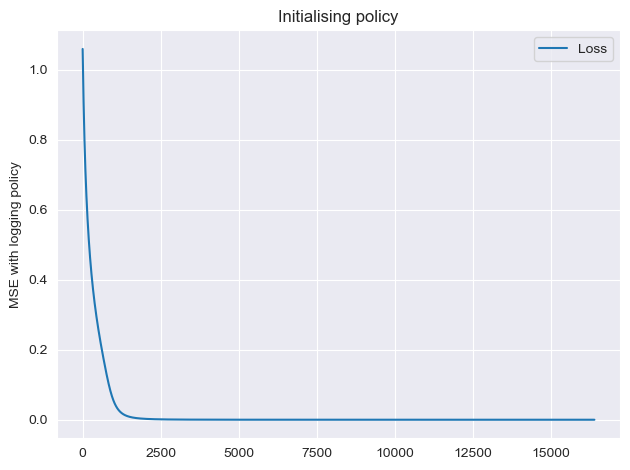

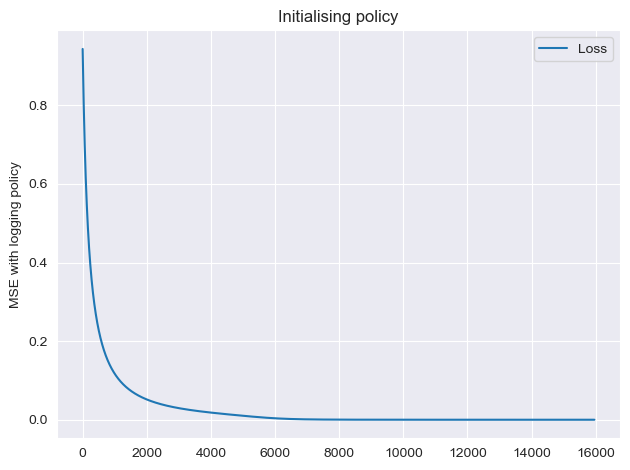

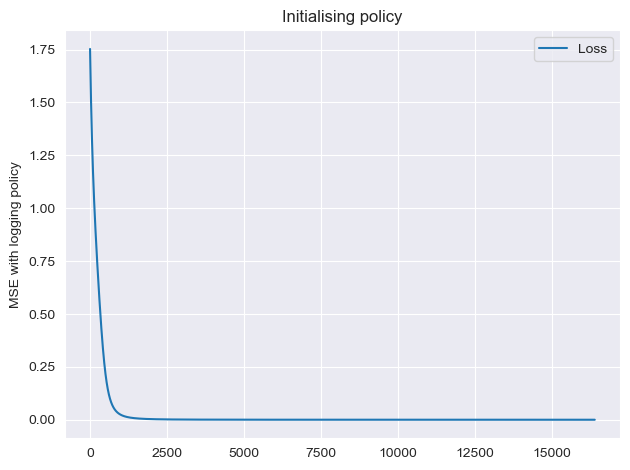

In [5]:
# Placeholders for output
auction_revenue = []
social_welfare = []
social_surplus = []
# Run repeated auctions
# This logic is encoded in the `simulation_run()` method in main.py
for i in tqdm(range(num_iter)):
    print( f'number of iteration: {i}\n')
    # Simulate impression opportunities
    for _ in range(rounds_per_iter):
        auction.simulate_opportunity()

    # Log 'Gross utility' or welfare
    social_welfare.append(sum([agent.gross_utility for agent in auction.agents]))

    # Log 'Net utility' or surplus
    social_surplus.append(sum([agent.net_utility for agent in auction.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction.agents):
        print(f'agent: {agent_id}\n' )
        agent.update(iteration=i)
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue.append(auction.revenue)
    auction.clear_revenue()

# Rescale metrics per auction round
auction_revenue = np.array(auction_revenue) / rounds_per_iter
social_welfare = np.array(social_welfare) / rounds_per_iter
social_surplus = np.array(social_surplus) / rounds_per_iter

# Save Auction

In [6]:
# pickle.dump(auction, open(f'DR_L_auction_{special}.pickle', 'wb'))

In [3]:
auction = pickle.load(open(f'DR_L_auction_{special}.pickle', 'rb'))

# data generation

In [7]:
# data generation
# Q2 the bidder updates seems does not use the utilities but the estimated_CTRs instead
# it seems to only use the utilities to calculate the welfare and surplus
# Input: context
# Action: bid/ gamma
# Output: reward
trained_welfare = {}
trained_surplus = {}

offline_data = {'train':{}, 'val': {}, 'test':{}}


num_data = [80000, 10000, 10000]

for i, data_set in enumerate(offline_data.keys()):
    for _ in range(num_data[i]):
        auction.simulate_opportunity()
    for agent_id, agent in enumerate(auction.agents):
        contexts = np.array(list(opp.context for opp in agent.logs))
        bids = np.array(list(opp.bid for opp in agent.logs))
        prices = np.array(list(opp.price for opp in agent.logs))
        second_prices = np.array(list(opp.second_price for opp in agent.logs))
        values = np.array(list(opp.value for opp in agent.logs))
        outcomes = np.array(list(opp.outcome for opp in agent.logs))
        won_mask = np.array(list(opp.won for opp in agent.logs))
        estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
        true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
        gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
        utilities = np.zeros_like(values)
        utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
        offline_data[data_set][agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), gammas.reshape(-1,1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
        agent.clear_utility()
        agent.clear_logs()
        # may consider including estimated_CTRs as input features as well
    auction.clear_revenue()

# Save Data

In [8]:
special

'13_contexts'

In [9]:
# data_dir = f"../data_{estimator}_{competition}_{special}/"
# if not os.path.exists(data_dir):
#     os.makedirs(data_dir)
# for data_set in offline_data.keys():
#     for agent_id in offline_data[data_set].keys():
#         np.savetxt(f'{data_dir}{data_set}_{agent_id}.csv', offline_data[data_set][agent_id])

In [10]:
# split_data
# for data_set in offline_data.keys():
#     for agent_id in offline_data[data_set].keys():
#         split_data(estimator=estimator, competition=competition, data_set=data_set, agent_num=str(agent_id), row_num=1000, data_dir=f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', special=f'_{special}')

# Read data

In [3]:
offline_data_key = {'context': 0, 'estimated_CTR': num_contexts, 'value': num_contexts+1, 'bid': num_contexts+2, 'gamma': num_contexts+3, 'true_CTR': num_contexts+4, 'price': num_contexts+5, 'second_price': num_contexts+6, 'won_mask': num_contexts+7, 'outcome': num_contexts+8, 'utility': num_contexts+9}

In [4]:
def read_csv_game_record_auction(csv_dir):
    data = np.genfromtxt(csv_dir, delimiter=' ')
    return data

In [5]:
offline_data = {'train': {}, 'val': {},'test': {}}
for agent_id in range(agent_num):
    offline_data['train'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/train_{agent_id}.csv")
    offline_data['val'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/val_{agent_id}.csv")
    offline_data['test'][agent_id] = read_csv_game_record_auction(f"../data_{estimator}_{competition}_{special}/test_{agent_id}.csv")

# CUTree

In [11]:
#for agent_id in offline_data['train'].keys():
min_split_int = 50
for agent_id in range(3):
    for max_depth in [20]:
            problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000,games_directory="../data_DR_L_split_1000/train/")

            CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000, training_mode='')
            print("Agent", agent_id)
            print("Max Depth", max_depth)
            input_train_data = offline_data['train'][agent_id][:, :5]
            label_train_data = offline_data['train'][agent_id][:, 7]

            input_test_data = offline_data['test'][agent_id][:, :5]
            label_test_data = offline_data['test'][agent_id][:, 7]

            train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', read_game_number=53, data_set='train')
            test_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', read_game_number=53, data_set='test')
            print("Train R2 score:", r2_score(label_train_data, train_preds))
            print("Test R2 score:", r2_score(label_test_data, test_preds))
            print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
            print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

Agent 0
Max Depth 20
<ipykernel.iostream.OutStream object at 0x107e53b50> starting from 53
<ipykernel.iostream.OutStream object at 0x107e53b50> finishing read tree


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 13 is different from 5)

In [9]:
train_avg_r2_utree = []
train_avg_mse_utree = []

test_avg_r2_utree = []
test_avg_mse_utree = []

In [12]:
agent_id = 2
max_depth = 20
min_split_int = 50

problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id)
CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000, num_contexts=num_contexts)

input_train_data = offline_data['train'][agent_id][:, :num_contexts]
label_train_data = offline_data['train'][agent_id][:, num_contexts+2]

input_test_data = offline_data['test'][agent_id][:, :num_contexts]
label_test_data = offline_data['test'][agent_id][:, num_contexts+2]

train_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', read_game_number=54, data_set='train')
test_preds = CUTreeAgent.get_prediction(save_path=f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/', game_path= f'/Users/keithwu/Documents/GitHub/auction-gym/data_{estimator}_{competition}_{special}/', read_game_number=54, data_set='test')

print("Train R2 score:", r2_score(label_train_data, train_preds))
print("Test R2 score:", r2_score(label_test_data, test_preds))
print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
train_avg_r2_utree.append(r2_score(label_train_data, train_preds))
train_avg_mse_utree.append(mean_squared_error(label_train_data, train_preds))
test_avg_r2_utree.append(r2_score(label_test_data, test_preds))
test_avg_mse_utree.append(mean_squared_error(label_test_data, test_preds))

<ipykernel.iostream.OutStream object at 0x103613b50> starting from 54
<ipykernel.iostream.OutStream object at 0x103613b50> finishing read tree
<ipykernel.iostream.OutStream object at 0x103613b50> starting from 54
<ipykernel.iostream.OutStream object at 0x103613b50> finishing read tree
Train R2 score: 0.7755951989300683
Test R2 score: 0.71381907465466
Train MSE:  0.004006699617083604
Test MSE:  0.00516734579342664


In [13]:
print(statistics.mean(train_avg_r2_utree))
print(statistics.mean(test_avg_r2_utree))
print(statistics.mean(train_avg_mse_utree))
print(statistics.mean(test_avg_mse_utree))

0.6737540611153698
0.5900130892415889
0.007634470482916544
0.009634964258750834


# M5 Tree

In [14]:
from m5py import M5Prime, export_text_m5

In [15]:
# model = M5Prime(use_smoothing=True, use_pruning=False)
# for agent_id in offline_data['train'].keys():
#     input_train_data = offline_data['train'][agent_id][:, :5]
#     label_train_data = offline_data['train'][agent_id][:, 7]
#     print("Agent", agent_id)
#     best_estimator = model.fit(input_train_data, label_train_data)
#     input_test_data = offline_data['test'][agent_id][:, :5]
#     label_test_data = offline_data['test'][agent_id][:, 7]
#
#     train_preds = best_estimator.predict(input_train_data)
#     test_preds = best_estimator.predict(input_test_data)
#     print("Train R2 score:", r2_score(label_train_data, train_preds))
#     print("Test R2 score:", r2_score(label_test_data, test_preds))
#     print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
#     print("Test MSE: ", mean_squared_error(label_test_data, test_preds))

In [24]:
param_grid = {
    'max_depth': [ 20]
    #'min_samples_split': [2, 4, 10, 20, 36, 50]
}

In [25]:
def gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data):
    best_params_ = None
    best_score_ = -100
    for max_depth in param_grid['max_depth']:
        #for min_samples_split in param_grid['min_samples_split']:
        model = model_class(max_depth= max_depth, random_state=0)
        model.fit(input_train_data, label_train_data)
        score = model.score(input_val_data, label_val_data)
        if score > best_score_:
            best_params_ = {'max_depth': max_depth}
            best_score_ = score


    print("Param for GS", best_params_)
    print("R2 score for GS", best_score_)
    best_model = model_class(**best_params_, random_state=0)
    return best_model

In [26]:
model_class = M5Prime
# without smoothing
context_bid_estimators_M5Tree = {}
train_avg_r2_m5 = []
train_avg_mse_m5 = []

test_avg_r2_m5 = []
test_avg_mse_m5 = []


# context with bid
for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :num_contexts].astype('float64')
    label_train_data = offline_data['train'][agent_id][:, offline_data_key['bid']].astype('float64')
    input_val_data = offline_data['val'][agent_id][:, :num_contexts].astype('float64')
    label_val_data = offline_data['val'][agent_id][:, offline_data_key['bid']].astype('float64')
    input_test_data = offline_data['test'][agent_id][:, :num_contexts].astype('float64')
    label_test_data = offline_data['test'][agent_id][:, offline_data_key['bid']].astype('float64')

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Train R2 score:", best_estimator.score(input_train_data, label_train_data))
    train_avg_r2_m5.append(best_estimator.score(input_train_data, label_train_data))
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))
    test_avg_r2_m5.append(best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    train_avg_mse_m5.append(mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    test_avg_mse_m5.append(mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_M5Tree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 20}
R2 score for GS 0.8529481593510231
Train R2 score: 0.9022585726518747
Test R2 score: 0.8539737373628136
Train MSE:  0.002726197480636688
Test MSE:  0.004072331499396226
Agent 1
Param for GS {'max_depth': 20}
R2 score for GS 0.7779672228590498
Train R2 score: 0.8350164040830862
Test R2 score: 0.7561345538363853
Train MSE:  0.003686391207689732
Test MSE:  0.005535133738565508
Agent 2
Param for GS {'max_depth': 20}
R2 score for GS 0.8010677640467192
Train R2 score: 0.8594824950634335
Test R2 score: 0.8050780460886399
Train MSE:  0.0025089099276776696
Test MSE:  0.0035195537137037536


In [27]:
print(statistics.mean(train_avg_r2_m5))
print(statistics.mean(test_avg_r2_m5))
print(statistics.mean(train_avg_mse_m5))
print(statistics.mean(test_avg_mse_m5))

0.8655858239327981
0.8050621124292796
0.002973832872001363
0.004375672983888496


In [28]:
# context with bid
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
train_avg_r2_rtree = []
train_avg_mse_rtree = []

test_avg_r2_rtree = []
test_avg_mse_rtree = []


for agent_id in offline_data['train'].keys():
    print("Agent", agent_id)
    input_train_data = offline_data['train'][agent_id][:, :num_contexts].astype('float64')
    label_train_data = offline_data['train'][agent_id][:, offline_data_key['bid']].astype('float64')
    input_val_data = offline_data['val'][agent_id][:, :num_contexts].astype('float64')
    label_val_data = offline_data['val'][agent_id][:, offline_data_key['bid']].astype('float64')
    input_test_data = offline_data['test'][agent_id][:, :num_contexts].astype('float64')
    label_test_data = offline_data['test'][agent_id][:, offline_data_key['bid']].astype('float64')

    best_estimator = gridSearch_val(model_class, param_grid, input_train_data, label_train_data, input_val_data, label_val_data)
    best_estimator.fit(input_train_data, label_train_data)
    print("Train R2 score:", best_estimator.score(input_train_data, label_train_data))
    train_avg_r2_rtree.append(best_estimator.score(input_train_data, label_train_data))
    print("Test R2 score:", best_estimator.score(input_test_data, label_test_data))
    test_avg_r2_rtree.append(best_estimator.score(input_test_data, label_test_data))

    train_preds = best_estimator.predict(input_train_data)
    test_preds = best_estimator.predict(input_test_data)
    print("Train MSE: ", mean_squared_error(label_train_data, train_preds))
    train_avg_mse_rtree.append(mean_squared_error(label_train_data, train_preds))
    print("Test MSE: ", mean_squared_error(label_test_data, test_preds))
    test_avg_mse_rtree.append(mean_squared_error(label_test_data, test_preds))
    context_bid_estimators_rTree[agent_id] = best_estimator

Agent 0
Param for GS {'max_depth': 20}
R2 score for GS 0.7718696709735848
Train R2 score: 0.9631289969346076
Test R2 score: 0.7696849687847874
Train MSE:  0.001028403599094241
Test MSE:  0.006422948444092336
Agent 1
Param for GS {'max_depth': 20}
R2 score for GS 0.6751497320663378
Train R2 score: 0.9220717855901627
Test R2 score: 0.6555409362456447
Train MSE:  0.0017412269555335466
Test MSE:  0.007818356455724448
Agent 2
Param for GS {'max_depth': 20}
R2 score for GS 0.6930202493318824
Train R2 score: 0.934563621531976
Test R2 score: 0.7111538000024488
Train MSE:  0.0011683525098443166
Test MSE:  0.005215470579331957


In [29]:
print(statistics.mean(train_avg_r2_rtree))
print(statistics.mean(test_avg_r2_rtree))
print(statistics.mean(train_avg_mse_rtree))
print(statistics.mean(test_avg_mse_rtree))

0.9399214680189154
0.7121265683442937
0.0013126610214907015
0.006485591826382914


In [9]:
# M5Tree
model_class = M5Prime
context_bid_estimators_M5Tree = {}
best_params = {0: 20, 1: 20, 2: 20}
for agent_id in offline_data['train'].keys():
    best_estimator = model_class(max_depth= best_params[agent_id], random_state=0)
    best_estimator.fit(offline_data['train'][agent_id][:, :num_contexts], offline_data['train'][agent_id][:, num_contexts+2])
    context_bid_estimators_M5Tree[agent_id] = best_estimator

# RTree
model_class = tree.DecisionTreeRegressor
context_bid_estimators_rTree = {}
best_params = {0: 20, 1: 20, 2: 20}
for agent_id in offline_data['train'].keys():
    best_estimator = model_class(max_depth= best_params[agent_id], random_state=0)
    best_estimator.fit(offline_data['train'][agent_id][:, :num_contexts], offline_data['train'][agent_id][:, num_contexts+2])
    context_bid_estimators_rTree[agent_id] = best_estimator

In [6]:
best_params_utree = {0: 20, 1: 20, 2: 20}

In [10]:
def utree_wrapper_predict_flex(contexts, agent_id, max_depth):
    min_split_int = 50
    read_game_number = 54
    utree_save_path = f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/'
    problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
    CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)
    utree = pickle.load(open(utree_save_path + 'pickle_Game_File_' + str(read_game_number) + '.p', 'rb'))
    return CUTreeAgent.predict(contexts, utree)

In [11]:
def utree_wrapper_model(agent_id, max_depth):
    min_split_int = 50
    read_game_number = 54
    utree_save_path = f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/'
    problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
    CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)
    utree = pickle.load(open(utree_save_path + 'pickle_Game_File_' + str(read_game_number) + '.p', 'rb'))
    return CUTreeAgent, utree

In [12]:
original_auction = pickle.load(open(f'{estimator}_{competition}_auction_{special}.pickle', 'rb'))
original_agents = deepcopy(original_auction.agents)
rng = original_auction.rng

In [13]:
def get_surrogate_utilities_utree(offline_data, offline_data_key ,context_num=5):
    surrogate_utilities = {}
    avg_r2 = []
    for agent_id in offline_data['train'].keys():
        surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
        data_set = 'test'
        surrogate_agent_id = agent_id

        surrogate_bid = utree_wrapper_predict_flex(offline_data[data_set][surrogate_agent_id][:, :context_num], agent_id, best_params_utree[agent_id])
        for i in range(len(offline_data[data_set][surrogate_agent_id])):
            # win_mask
            if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
                if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                    surrogate_logs['won_mask'].append(True)
                    surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
            else:
                if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                    surrogate_logs['won_mask'].append(True)
                    # This creates randomness in the surrogate model
                    outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                    surrogate_logs['outcomes'].append(outcome)
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

        surrogate_won_mask = np.array(surrogate_logs['won_mask'])
        surrogate_outcomes = np.array(surrogate_logs['outcomes'])
        surrogate_prices = np.array(surrogate_logs['prices'])
        surrogate_utilities[agent_id] = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
        surrogate_utilities[agent_id][surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
        print(f"Agent: {agent_id}")
        print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
        print(f"Surrogate utility: {surrogate_utilities[agent_id].mean()}" )
        print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id])}")
        avg_r2.append(r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id]))
    return surrogate_utilities, statistics.mean(avg_r2)

In [14]:
def get_surrogate_utilities(context_bid_estimators,  offline_data, offline_data_key ,context_num=5):
    surrogate_utilities = {}
    avg_r2 = []
    for agent_id in offline_data['train'].keys():
        surrogate_logs = {'outcomes':[], 'won_mask':[], 'prices':[]}
        data_set = 'test'
        surrogate_agent_id = agent_id
        surrogate_bid = context_bid_estimators[surrogate_agent_id].predict(offline_data[data_set][surrogate_agent_id][:, :context_num])
        for i in range(len(offline_data[data_set][surrogate_agent_id])):
            # win_mask
            if offline_data[data_set][surrogate_agent_id][i, offline_data_key['won_mask']] == 1:
                if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['bid']]) or (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['second_price']]):
                    surrogate_logs['won_mask'].append(True)
                    surrogate_logs['outcomes'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['outcome']])
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])
            else:
                if (surrogate_bid[i] >= offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']]):
                    surrogate_logs['won_mask'].append(True)
                    # This creates randomness in the surrogate model
                    outcome = rng.binomial(1, offline_data[data_set][surrogate_agent_id][i, offline_data_key['true_CTR']])
                    surrogate_logs['outcomes'].append(outcome)
                    surrogate_logs['prices'].append(surrogate_bid[i])
                else:
                    surrogate_logs['won_mask'].append(False)
                    surrogate_logs['outcomes'].append(0)
                    surrogate_logs['prices'].append(offline_data[data_set][surrogate_agent_id][i, offline_data_key['price']])

        surrogate_won_mask = np.array(surrogate_logs['won_mask'])
        surrogate_outcomes = np.array(surrogate_logs['outcomes'])
        surrogate_prices = np.array(surrogate_logs['prices'])
        surrogate_utilities[agent_id] = np.zeros_like(offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']])
        surrogate_utilities[agent_id][surrogate_won_mask] = (offline_data[data_set][surrogate_agent_id][:, offline_data_key['value']][surrogate_won_mask] * surrogate_outcomes[surrogate_won_mask]) - surrogate_prices[surrogate_won_mask]
        print(f"Agent: {agent_id}")
        print(f"Original utility: {offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']].mean()}")
        print(f"Surrogate utility: {surrogate_utilities[agent_id].mean()}" )
        print(f"R2 score: {r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id])}")
        avg_r2.append(r2_score(offline_data[data_set][surrogate_agent_id][:, offline_data_key['utility']], surrogate_utilities[agent_id]))
    return surrogate_utilities, statistics.mean(avg_r2)

In [15]:
def print_agent_replace_metric(surrogate_avg_r2, surrogate_utilities, offline_data):
    print("R2")
    print(surrogate_avg_r2)
    surrogate_sum_utilities = 0
    perc_chg_utilities = []

    for agent_id in offline_data['train'].keys():
        surrogate_sum_utilities += surrogate_utilities[agent_id].sum()
    print("surrogate")
    print(surrogate_sum_utilities/10000)
    sum_utilities_DR = 0
    for agent_id in offline_data['train'].keys():
        sum_utilities_DR += offline_data['test'][agent_id][:, offline_data_key['utility']].sum()
        perc_chg_utilities.append((surrogate_utilities[agent_id].sum() - offline_data['test'][agent_id][:, offline_data_key['utility']].sum())/ offline_data['test'][agent_id][:, offline_data_key['utility']].sum())
    print("DR")
    print(sum_utilities_DR/10000)
    print("% change in social surplus")
    print((surrogate_sum_utilities-sum_utilities_DR)/sum_utilities_DR*100)
    print("Avg % change in net utility")
    print(statistics.mean(perc_chg_utilities)*100)

In [16]:
surrogate_utilities_utree, surrogate_avg_r2_utree =get_surrogate_utilities_utree(offline_data=offline_data,offline_data_key=offline_data_key,context_num=num_contexts)

Agent: 0
Original utility: 0.07679185957718598
Surrogate utility: 0.051097948685202996
R2 score: 0.5373712652823515
Agent: 1
Original utility: 0.13837945046404537
Surrogate utility: 0.10580567293642967
R2 score: 0.7413326551100636
Agent: 2
Original utility: 0.11542017859009998
Surrogate utility: 0.10349675644235615
R2 score: 0.762893129880609


In [23]:
print_agent_replace_metric(surrogate_avg_r2_utree, surrogate_utilities_utree, offline_data)

R2
0.680532350091008
surrogate
0.17348508150858596
DR
0.22027824507491156
% change in social surplus
-21.24275302375516
Avg % change in net utility
-22.44302324211907


In [22]:
surrogate_utilities_rtree, surrogate_avg_r2_rtree =get_surrogate_utilities(context_bid_estimators_rTree, offline_data=offline_data,offline_data_key=offline_data_key,context_num=num_contexts)

Agent: 0
Original utility: 0.07679185957718598
Surrogate utility: 0.0609725304171644
R2 score: 0.6617719046117949
Agent: 1
Original utility: 0.13837945046404537
Surrogate utility: 0.12158410138722323
R2 score: 0.7863525178237477
Agent: 2
Original utility: 0.11542017859009998
Surrogate utility: 0.10744789677285625
R2 score: 0.7476499847609946


In [19]:
print_agent_replace_metric(surrogate_avg_r2_rtree, surrogate_utilities_rtree, offline_data)

R2
0.7281173093862267
surrogate
0.19464617052478836
DR
0.22027824507491156
% change in social surplus
-11.636226056461593
Avg % change in net utility
-12.09246905916915


In [24]:
surrogate_utilities_m5tree, surrogate_avg_r2_m5tree =get_surrogate_utilities(context_bid_estimators_M5Tree, offline_data=offline_data,offline_data_key=offline_data_key,context_num=num_contexts)

Agent: 0
Original utility: 0.07679185957718598
Surrogate utility: 0.06519747763407172
R2 score: 0.739583229154126
Agent: 1
Original utility: 0.13837945046404537
Surrogate utility: 0.12774988140207755
R2 score: 0.808367375694897
Agent: 2
Original utility: 0.11542017859009998
Surrogate utility: 0.10751863752108394
R2 score: 0.7873889587975931


In [25]:
print_agent_replace_metric(surrogate_avg_r2_m5tree, surrogate_utilities_m5tree, offline_data)

R2
0.7784465212155387
surrogate
0.20019070673937106
DR
0.22027824507491156
% change in social surplus
-9.119165775407907
Avg % change in net utility
-9.875269704140202


# Auction with original model

In [26]:
# Auction with original model
auction_trained = deepcopy(original_auction)
# Placeholders for output
auction_revenue_trained = []
social_welfare_trained = []
social_surplus_trained = []
rounds_per_iter = 10000
utilities_trained ={key: 0 for key in range(3)}

for i in tqdm(range(3)):
    for _ in range(rounds_per_iter):
        # Simulate impression opportunities
        auction_trained.simulate_opportunity()

# Log 'Gross utility' or welfare
    social_welfare_trained.append(sum([agent.gross_utility for agent in auction_trained.agents]))

    # Log 'Net utility' or surplus
    social_surplus_trained.append(sum([agent.net_utility for agent in auction_trained.agents]))

    # Update agents (does nothing in this example, as we have truthful oracles)
    # Clear running metrics
    for agent_id, agent in enumerate(auction_trained.agents):
        print(f'agent: {agent_id}\n' )
        utilities_trained[agent_id]+= agent.net_utility
        agent.clear_utility()
        agent.clear_logs()

    # Log revenue
    auction_revenue_trained.append(auction_trained.revenue)
    auction_trained.clear_revenue()

# Rescale metrics per auction round
auction_revenue_trained = np.array(auction_revenue_trained) / rounds_per_iter
social_welfare_trained = np.array(social_welfare_trained) / rounds_per_iter
social_surplus_trained = np.array(social_surplus_trained) / rounds_per_iter
print(auction_revenue_trained.mean())
print(social_welfare_trained.mean())
print(social_surplus_trained.mean())

  0%|          | 0/3 [00:00<?, ?it/s]

agent: 0

agent: 1

agent: 2

agent: 0

agent: 1

agent: 2

agent: 0

agent: 1

agent: 2

0.4873719612835681
0.7040678187452948
0.21669585746172682


In [27]:
def surrogate_agent(auction, agents, context_bid_estimators, rounds_per_iter=10000, rng=None):
    auction_surrogate = deepcopy(auction)
    utilities_dict = {
    'Agent 0 Replaced': {key: 0 for key in range(3)},
    'Agent 1 Replaced': {key: 0 for key in range(3)},
    'Agent 2 Replaced': {key: 0 for key in range(3)}
    }
    avg_auction_revenue_surrogate = []
    avg_social_welfare_surrogate = []
    avg_social_surplus_surrogate = []
    for replacing_agent_id in range(3):
        print(f'replacing agent: {replacing_agent_id}\n')
        check_data = {}
        agents_surrogate = deepcopy(agents)
        #agents are still the trained agents from black box
        agents_surrogate[replacing_agent_id].bidder = SurrogateBidder(rng=rng, model=context_bid_estimators[replacing_agent_id])
        for agent_id in range(3):
            print(agents_surrogate[agent_id].bidder)

        auction_surrogate.agents = agents_surrogate

        # Placeholders for output
        auction_revenue_surrogate = []
        social_welfare_surrogate = []
        social_surplus_surrogate = []
        # Run repeated auctions
        # This logic is encoded in the `simulation_run()` method in main.py

        for i in tqdm(range(3)):
            for _ in range(rounds_per_iter):
                # Simulate impression opportunities
                auction_surrogate.simulate_opportunity()

            # Log 'Gross utility' or welfare
            social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

            # Log 'Net utility' or surplus
            social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

            # Update agents (does nothing in this example, as we have truthful oracles)
            # Clear running metrics
            for agent_id, agent in enumerate(auction_surrogate.agents):
                contexts = np.array(list(opp.context for opp in agent.logs))
                bids = np.array(list(opp.bid for opp in agent.logs))
                prices = np.array(list(opp.price for opp in agent.logs))
                second_prices = np.array(list(opp.second_price for opp in agent.logs))
                values = np.array(list(opp.value for opp in agent.logs))
                outcomes = np.array(list(opp.outcome for opp in agent.logs))
                won_mask = np.array(list(opp.won for opp in agent.logs))
                estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
                true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
                #gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
                utilities = np.zeros_like(values)
                utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
                check_data[agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), bids.reshape(-1, 1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
                utilities_dict[f'Agent {replacing_agent_id} Replaced'][agent_id]+= agent.net_utility
                agent.clear_utility()
                agent.clear_logs()

            # Log revenue
            auction_revenue_surrogate.append(auction_surrogate.revenue)
            auction_surrogate.clear_revenue()

        # Rescale metrics per auction round
        auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
        social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
        social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

        print(auction_revenue_surrogate.mean())
        print(social_welfare_surrogate.mean())
        print(social_surplus_surrogate.mean())
        avg_auction_revenue_surrogate.append(auction_revenue_surrogate.mean())
        avg_social_welfare_surrogate.append(social_welfare_surrogate.mean())
        avg_social_surplus_surrogate.append(social_surplus_surrogate.mean())

    print('**********************************')
    print(f'Avg. Auction Revenue over 3 replacements {np.array(avg_auction_revenue_surrogate).mean()}')
    print(f'Avg. Social Welfare over 3 replacements {np.array(avg_social_welfare_surrogate).mean()}')
    print(f'Avg. Social Surplus over 3 replacements {np.array(avg_social_surplus_surrogate).mean()}')

    return check_data, utilities_dict

In [28]:
def surrogate_agent_utree(auction, agents,  rounds_per_iter=10000, rng=None):
    auction_surrogate = deepcopy(auction)
    utilities_dict = {
    'Agent 0 Replaced': {key: 0 for key in range(3)},
    'Agent 1 Replaced': {key: 0 for key in range(3)},
    'Agent 2 Replaced': {key: 0 for key in range(3)}
    }
    avg_auction_revenue_surrogate = []
    avg_social_welfare_surrogate = []
    avg_social_surplus_surrogate = []
    for replacing_agent_id in range(3):
        print(f'replacing agent: {replacing_agent_id}\n')
        check_data = {}
        agents_surrogate = deepcopy(agents)
        #agents are still the trained agents from black box
        utree_model, utree = utree_wrapper_model(replacing_agent_id, best_params_utree[replacing_agent_id])
        agents_surrogate[replacing_agent_id].bidder = SurrogateBidder_utree(rng=rng, model=utree_model, utree=utree)
        for agent_id in range(3):
            print(agents_surrogate[agent_id].bidder)

        auction_surrogate.agents = agents_surrogate

        # Placeholders for output
        auction_revenue_surrogate = []
        social_welfare_surrogate = []
        social_surplus_surrogate = []
        # Run repeated auctions
        # This logic is encoded in the `simulation_run()` method in main.py

        for i in tqdm(range(3)):
            for _ in range(rounds_per_iter):
                # Simulate impression opportunities
                auction_surrogate.simulate_opportunity()

            # Log 'Gross utility' or welfare
            social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

            # Log 'Net utility' or surplus
            social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

            # Update agents (does nothing in this example, as we have truthful oracles)
            # Clear running metrics
            for agent_id, agent in enumerate(auction_surrogate.agents):
                contexts = np.array(list(opp.context for opp in agent.logs))
                bids = np.array(list(opp.bid for opp in agent.logs))
                prices = np.array(list(opp.price for opp in agent.logs))
                second_prices = np.array(list(opp.second_price for opp in agent.logs))
                values = np.array(list(opp.value for opp in agent.logs))
                outcomes = np.array(list(opp.outcome for opp in agent.logs))
                won_mask = np.array(list(opp.won for opp in agent.logs))
                estimated_CTRs = np.array(list(opp.estimated_CTR for opp in agent.logs))
                true_CTRs = np.array(list(opp.true_CTR for opp in agent.logs))
                #gammas = np.array(list(opp.detach().numpy() for opp in agent.bidder.gammas))
                utilities = np.zeros_like(values)
                utilities[won_mask] = (values[won_mask] * outcomes[won_mask]) - prices[won_mask]
                check_data[agent_id] = np.hstack((contexts, estimated_CTRs.reshape(-1, 1),values.reshape(-1, 1), bids.reshape(-1, 1), bids.reshape(-1, 1), true_CTRs.reshape(-1,1), prices.reshape(-1, 1),second_prices.reshape(-1,1), won_mask.reshape(-1, 1),outcomes.reshape(-1, 1),utilities.reshape(-1, 1)))
                utilities_dict[f'Agent {replacing_agent_id} Replaced'][agent_id]+= agent.net_utility
                agent.clear_utility()
                agent.clear_logs()

            # Log revenue
            auction_revenue_surrogate.append(auction_surrogate.revenue)
            auction_surrogate.clear_revenue()

        # Rescale metrics per auction round
        auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
        social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
        social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

        print(auction_revenue_surrogate.mean())
        print(social_welfare_surrogate.mean())
        print(social_surplus_surrogate.mean())
        avg_auction_revenue_surrogate.append(auction_revenue_surrogate.mean())
        avg_social_welfare_surrogate.append(social_welfare_surrogate.mean())
        avg_social_surplus_surrogate.append(social_surplus_surrogate.mean())

    print('**********************************')
    print(f'Avg. Auction Revenue over 3 replacements {np.array(avg_auction_revenue_surrogate).mean()}')
    print(f'Avg. Social Welfare over 3 replacements {np.array(avg_social_welfare_surrogate).mean()}')
    print(f'Avg. Social Surplus over 3 replacements {np.array(avg_social_surplus_surrogate).mean()}')

    return check_data, utilities_dict

In [29]:
surrogate_agent_rTree, utilities_dict_rTree = surrogate_agent(original_auction, original_agents, context_bid_estimators_rTree, rounds_per_iter=10000, rng=original_auction.rng)
df_utilities_dict_rTree = pd.DataFrame(utilities_dict_rTree)
df_utilities_dict_rTree.index = [f"Agent{i}" for i in df_utilities_dict_rTree.index]
df_utilities_dict_rTree /= 3
print(df_utilities_dict_rTree)

replacing agent: 0



  0%|          | 0/3 [00:00<?, ?it/s]

0.48718957105352684
0.7014174695665467
0.2142278985130215
replacing agent: 1



  0%|          | 0/3 [00:00<?, ?it/s]

0.486913035653249
0.6977324938508808
0.21081945819763104
replacing agent: 2



  0%|          | 0/3 [00:00<?, ?it/s]

0.48628171179459106
0.6975744865797887
0.2112927747851975
**********************************
Avg. Auction Revenue over 3 replacements 0.48679477283378897
Avg. Social Welfare over 3 replacements 0.6989081499990721
Avg. Social Surplus over 3 replacements 0.21211337716528333
        Agent 0 Replaced  Agent 1 Replaced  Agent 2 Replaced
Agent0        492.068064        489.798516        493.291006
Agent1        919.256604        919.644039        930.948956
Agent2        730.954318        698.752028        688.687786


In [30]:
surrogate_agent_m5, utilities_dict_m5 = surrogate_agent(original_auction, original_agents, context_bid_estimators_M5Tree, rounds_per_iter=10000, rng=original_auction.rng)
df_utilities_dict_m5 = pd.DataFrame(utilities_dict_m5)
df_utilities_dict_m5.index = [f"Agent{i}" for i in df_utilities_dict_m5.index]
df_utilities_dict_m5 /= 3
print(df_utilities_dict_m5)

replacing agent: 0



  0%|          | 0/3 [00:00<?, ?it/s]

0.48503145897729044
0.7025461898324495
0.21751473085515974
replacing agent: 1



  0%|          | 0/3 [00:00<?, ?it/s]

0.4838232068463019
0.6981332878863077
0.21431008104000418
replacing agent: 2



  0%|          | 0/3 [00:00<?, ?it/s]

0.4852537294740646
0.6958398621935667
0.21058613271950408
**********************************
Avg. Auction Revenue over 3 replacements 0.4847027984325523
Avg. Social Welfare over 3 replacements 0.6988397799707746
Avg. Social Surplus over 3 replacements 0.21413698153822266
        Agent 0 Replaced  Agent 1 Replaced  Agent 2 Replaced
Agent0        466.375095        502.118835        488.152295
Agent1        941.006362        924.073738        934.805066
Agent2        767.765852        716.908237        682.903966


In [31]:
surrogate_agent_uTree, utilities_dict_uTree = surrogate_agent_utree(original_auction, original_agents, rounds_per_iter=10000, rng=original_auction.rng)
df_utilities_dict_uTree = pd.DataFrame(utilities_dict_uTree)
df_utilities_dict_uTree.index = [f"Agent{i}" for i in df_utilities_dict_uTree.index]
df_utilities_dict_uTree /= 3
print(df_utilities_dict_uTree)

replacing agent: 0



  0%|          | 0/3 [00:00<?, ?it/s]

0.48570095013316567
0.6962457556712699
0.21054480553810417
replacing agent: 1



  0%|          | 0/3 [00:00<?, ?it/s]

0.4862550375521608
0.6919751874656717
0.2057201499135133
replacing agent: 2



  0%|          | 0/3 [00:00<?, ?it/s]

0.48660046109993615
0.6949030542870515
0.20830259318711772
**********************************
Avg. Auction Revenue over 3 replacements 0.4861854829284209
Avg. Social Welfare over 3 replacements 0.6943746658079976
Avg. Social Surplus over 3 replacements 0.2081891828795784
        Agent 0 Replaced  Agent 1 Replaced  Agent 2 Replaced
Agent0        364.056144        510.351288        479.850910
Agent1        959.967500        793.980708        922.679895
Agent2        781.424411        752.869503        680.495127


In [32]:
def surrogate_auction(auction, agents, context_bid_estimators, rounds_per_iter=10000, rng=None):
    agents_surrogate = deepcopy(agents)
    auction_surrogate = deepcopy(auction)
    #agents are still the trained agents from black box
    for i, agent in enumerate(agents_surrogate):
        agent.bidder = SurrogateBidder(rng=rng, model=context_bid_estimators[i])
    auction_surrogate.agents = agents_surrogate

    # Placeholders for output
    auction_revenue_surrogate = []
    social_welfare_surrogate = []
    social_surplus_surrogate = []
    # Run repeated auctions
    # This logic is encoded in the `simulation_run()` method in main.py
    for i in tqdm(range(3)):
        for _ in range(rounds_per_iter):
            # Simulate impression opportunities
            auction_surrogate.simulate_opportunity()

        # Log 'Gross utility' or welfare
        social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

        # Log 'Net utility' or surplus
        social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

        # Update agents (does nothing in this example, as we have truthful oracles)
        # Clear running metrics
        for agent_id, agent in enumerate(auction_surrogate.agents):
            agent.clear_utility()
            agent.clear_logs()

        # Log revenue
        auction_revenue_surrogate.append(auction_surrogate.revenue)
        auction_surrogate.clear_revenue()

    # Rescale metrics per auction round
    auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
    social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
    social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

    print(auction_revenue_surrogate.mean())
    print(social_welfare_surrogate.mean())
    print(social_surplus_surrogate.mean())

In [33]:
def surrogate_auction_utree(auction, agents, rounds_per_iter=10000, rng=None):

    agents_surrogate = deepcopy(agents)
    auction_surrogate = deepcopy(auction)
    #agents are still the trained agents from black box
    for i, agent in enumerate(agents_surrogate):
        utree_model, utree = utree_wrapper_model(i, best_params_utree[i])
        agent.bidder = SurrogateBidder_utree(rng=rng, model=utree_model, utree=utree)
    auction_surrogate.agents = agents_surrogate

    # Placeholders for output
    auction_revenue_surrogate = []
    social_welfare_surrogate = []
    social_surplus_surrogate = []
    # Run repeated auctions
    # This logic is encoded in the `simulation_run()` method in main.py
    for i in tqdm(range(3)):
        for _ in range(rounds_per_iter):
            # Simulate impression opportunities
            auction_surrogate.simulate_opportunity()

        # Log 'Gross utility' or welfare
        social_welfare_surrogate.append(sum([agent.gross_utility for agent in auction_surrogate.agents]))

        # Log 'Net utility' or surplus
        social_surplus_surrogate.append(sum([agent.net_utility for agent in auction_surrogate.agents]))

        # Update agents (does nothing in this example, as we have truthful oracles)
        # Clear running metrics
        for agent_id, agent in enumerate(auction_surrogate.agents):
            agent.clear_utility()
            agent.clear_logs()

        # Log revenue
        auction_revenue_surrogate.append(auction_surrogate.revenue)
        auction_surrogate.clear_revenue()

    # Rescale metrics per auction round
    auction_revenue_surrogate = np.array(auction_revenue_surrogate) / rounds_per_iter
    social_welfare_surrogate = np.array(social_welfare_surrogate) / rounds_per_iter
    social_surplus_surrogate = np.array(social_surplus_surrogate) / rounds_per_iter

    print(auction_revenue_surrogate.mean())
    print(social_welfare_surrogate.mean())
    print(social_surplus_surrogate.mean())

In [34]:
surrogate_auction(original_auction, original_agents, context_bid_estimators_rTree, rounds_per_iter=10000, rng=rng)

  0%|          | 0/3 [00:00<?, ?it/s]

0.4855704389039484
0.6968999845196607
0.2113295456157128


In [35]:
surrogate_auction(original_auction, original_agents, context_bid_estimators_M5Tree, rounds_per_iter=10000, rng=rng)

  0%|          | 0/3 [00:00<?, ?it/s]

0.47858871248414125
0.69547200969271
0.21688329720856805


In [36]:
surrogate_auction_utree(original_auction, original_agents, rounds_per_iter=10000, rng=rng)

  0%|          | 0/3 [00:00<?, ?it/s]

0.47792297328427186
0.6852808276019421
0.20735785431766962


# SHAP

In [67]:
def utree_wrapper_predict(contexts):
    agent_id = 1
    max_depth = 20
    min_split_int = 50
    read_game_number = 54
    utree_save_path = f'/Users/keithwu/Documents/GitHub/auction-gym/src/UTree_model_numpy/{estimator}_{competition}_{special}/agent_{agent_id}/model_boost_linear_save_1000_max_hist_10000_max_depth_{max_depth}_min_split_instances_{min_split_int}/'
    problem = Problem.Problem(estimator_type=estimator, competition=competition, agent_num=agent_id, split_size=1000)
    CUTreeAgent = Agent.CUTreeAgent(problem=problem, max_hist=10000)
    utree = pickle.load(open(utree_save_path + 'pickle_Game_File_' + str(read_game_number) + '.p', 'rb'))

    return CUTreeAgent.predict(contexts, utree=utree)

In [68]:
def dr_wrapper_predict(context):
    return auction.predict(agent_id,context)

# Only do the worst performing agent by Avg R2 score

In [69]:
agent_id =1
num_samples = 500
random_indices = np.random.choice(offline_data['test'][agent_id].shape[0], num_samples, replace=False)
subset_data = offline_data['test'][agent_id][random_indices, :num_contexts]

In [70]:
background = {}
explainer_DR = {}
shap_values_DR = {}
explainer_rTree = {}
shap_values_rTree = {}
explainer_m5Tree  = {}
shap_values_m5Tree = {}
explainer_utree = {}
shap_values_utree = {}

background[agent_id] = shap.kmeans(offline_data['train'][agent_id][:, :num_contexts], 10)
explainer_utree[agent_id] = shap.KernelExplainer(utree_wrapper_predict, background[agent_id])
shap_values_utree[agent_id] = explainer_utree[agent_id].shap_values(subset_data)

explainer_DR[agent_id] = shap.KernelExplainer(dr_wrapper_predict, background[agent_id])
shap_values_DR[agent_id] = explainer_DR[agent_id].shap_values(subset_data)

explainer_rTree[agent_id] = shap.KernelExplainer(context_bid_estimators_rTree[agent_id].predict, background[agent_id])
shap_values_rTree[agent_id] = explainer_rTree[agent_id].shap_values(subset_data)

explainer_m5Tree[agent_id] = shap.KernelExplainer(context_bid_estimators_M5Tree[agent_id].predict, background[agent_id])
shap_values_m5Tree[agent_id] = explainer_m5Tree[agent_id].shap_values(subset_data)

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [65]:
mean_abs_shap = np.abs(shap_values_DR[agent_id]).mean(axis=0).tolist()
mean_abs_shap_rtree = np.abs(shap_values_rTree[agent_id]).mean(axis=0).tolist()
mean_abs_shap_m5 = np.abs(shap_values_m5Tree[agent_id]).mean(axis=0).tolist()
mean_abs_shap_utree = np.abs(shap_values_utree[agent_id]).mean(axis=0).tolist()
mean_abs_shap.extend(mean_abs_shap_rtree)
mean_abs_shap.extend(mean_abs_shap_m5)
mean_abs_shap.extend(mean_abs_shap_utree)
df = pd.DataFrame({'Features': [str(i) for _ in range(4) for i in range(num_contexts)], 'Mean Absolute SHAP': mean_abs_shap, 'Model': ['DR']*num_contexts + ['CART']*num_contexts + ['M5Tree']*num_contexts + ['LMUT']*num_contexts})

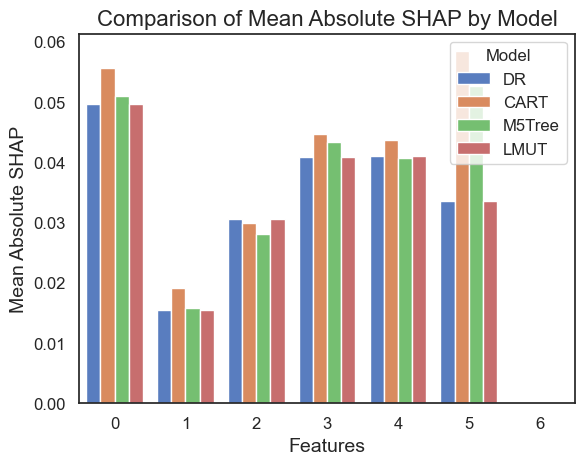

In [66]:
sns.set(style='white')
palette = sns.color_palette("muted")

sns_plot = sns.barplot(x='Features', y='Mean Absolute SHAP', hue='Model', data=df, palette=palette)
sns_plot.set_title("Comparison of Mean Absolute SHAP by Model", fontsize=16)
sns_plot.set_xlabel('Features', fontsize=14)
sns_plot.set_ylabel('Mean Absolute SHAP', fontsize=14)
sns_plot.tick_params(axis='x', labelsize=12)
sns_plot.tick_params(axis='y', labelsize=12)
sns_plot.legend(title='Model', fontsize=12)
sns_plot.figure.savefig(f"{estimator}_{competition}_{special}.png")